In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import squarify

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.pipeline import make_pipeline
#importing polynomial features
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"H:\New Datasets\Machine Learning Projects\Seoul Bike Sharing Demand Prediction\Seoul Bike Data.csv",encoding='latin1')

In [3]:
print(df.shape)
df.head()

(8760, 14)


Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [5]:
df.dropna(how = 'any').shape

(8760, 14)

In [6]:
df.duplicated().sum()

0

In [7]:
df.drop_duplicates(keep = 'first').shape

(8760, 14)

In [8]:
df.drop_duplicates(keep = False).shape

(8760, 14)

In [9]:
df.dropna(subset = ['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'], how = 'any').shape

(8760, 14)

In [10]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [11]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Rented Bike Count', 'Hour', 'Humidity(%)', 'Visibility (10m)'], float64: ['Temperature(°C)', 'Wind speed (m/s)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'], object: ['Date', 'Seasons', 'Holiday', 'Functioning Day']}

In [12]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [13]:
df["Date"].fillna(method ='ffill', inplace = True)
df["Rented Bike Count"].fillna(method = 'ffill', inplace = True)
df["Hour"].fillna(method = 'ffill', inplace = True)
df["Temperature(°C)"].fillna(method = 'ffill', inplace = True)
df["Humidity(%)"].fillna(method = 'ffill', inplace = True)
df["Wind speed (m/s)"].fillna(method = 'ffill', inplace = True)
df["Visibility (10m)"].fillna(method ='ffill', inplace = True)
df["Dew point temperature(°C)"].fillna(method ='ffill', inplace = True)
df["Solar Radiation (MJ/m2)"].fillna(method = 'ffill', inplace = True)
df["Rainfall(mm)"].fillna(method = 'ffill', inplace = True)
df["Snowfall (cm)"].fillna(method = 'ffill', inplace = True)
df["Seasons"].fillna(method = 'ffill', inplace = True)
df["Holiday"].fillna(method = 'ffill', inplace = True)
df["Functioning Day"].fillna(method ='ffill', inplace = True)
df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

In [14]:
# Custom Function for Dtype,Unique values and Null values
def dfinfo():
    temp_ps = pd.DataFrame(index = df.columns)
    temp_ps['DataType'] = df.dtypes
    temp_ps["Non-null_Values"] = df.count()
    temp_ps['Unique_Values'] = df.nunique()
    temp_ps['NaN_Values'] = df.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(df))*100 
    return temp_ps

In [15]:
#convert in datetime64[ns] datatype
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Date']

0      2017-12-01
1      2017-12-01
2      2017-12-01
3      2017-12-01
4      2017-12-01
          ...    
8755   2018-11-30
8756   2018-11-30
8757   2018-11-30
8758   2018-11-30
8759   2018-11-30
Name: Date, Length: 8760, dtype: datetime64[ns]

In [16]:
# split day of week, month and year in three column
df['Day_Of_Week'] = df['Date'].dt.day_name() # extract week name from Date column
df["Month"] = df['Date'].dt.month_name()   # extract month name from Date column
df["Year"] = df['Date'].map(lambda x: x.year).astype("object")

In [17]:
# drop the Date column
df.drop(columns=['Date'],inplace=True)

In [18]:
df.nunique()

Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
Day_Of_Week                     7
Month                          12
Year                            2
dtype: int64

In [19]:
df.notnull().tail()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
8755               True  True             True         True              True   
8756               True  True             True         True              True   
8757               True  True             True         True              True   
8758               True  True             True         True              True   
8759               True  True             True         True              True   

      Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
8755              True                       True                     True   
8756              True                       True                     True   
8757              True                       True                     True   
8758              True                       True                     True   
8759              True                       True                     True   

      Rainfall(mm)  Snowfall (cm)  Seasons  Holiday  Functioning Day  \
8755          True           True     True     True             True   
8756          True           True     True     True             True   
8757          True           True     True     True             True   
8758          True           True     True     True             True   
8759          True           True     True     True             True   

      Day_Of_Week  Month  Year  
8755         True   True  True  
8756         True   True  True  
8757         True   True  True  
8758         True   True  True  
8759         True   True  True

In [20]:
df.apply(lambda x: x.dtype)

Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
Day_Of_Week                   object
Month                         object
Year                          object
dtype: object

In [21]:
round((df.apply(lambda x:x.isnull().sum())/len(df))*100,2)

Rented Bike Count            0.0
Hour                         0.0
Temperature(°C)              0.0
Humidity(%)                  0.0
Wind speed (m/s)             0.0
Visibility (10m)             0.0
Dew point temperature(°C)    0.0
Solar Radiation (MJ/m2)      0.0
Rainfall(mm)                 0.0
Snowfall (cm)                0.0
Seasons                      0.0
Holiday                      0.0
Functioning Day              0.0
Day_Of_Week                  0.0
Month                        0.0
Year                         0.0
dtype: float64

In [22]:
#Checking for percentage of missing values in each columns
(df.isnull().sum()/len(df))*100

Rented Bike Count            0.0
Hour                         0.0
Temperature(°C)              0.0
Humidity(%)                  0.0
Wind speed (m/s)             0.0
Visibility (10m)             0.0
Dew point temperature(°C)    0.0
Solar Radiation (MJ/m2)      0.0
Rainfall(mm)                 0.0
Snowfall (cm)                0.0
Seasons                      0.0
Holiday                      0.0
Functioning Day              0.0
Day_Of_Week                  0.0
Month                        0.0
Year                         0.0
dtype: float64

In [23]:
total_miss = df.isnull().sum()
perc_miss = total_miss/df.isnull().count()*100

missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':perc_miss})

missing_data.sort_values(by='Total missing',ascending=False).head(3)

Total missing  % missing
Rented Bike Count              0        0.0
Hour                           0        0.0
Temperature(°C)                0        0.0

In [24]:
print('Unique Values for Each Feature: \n')
for i in df.columns:
    print(i, ':',df[i].nunique()) 

Unique Values for Each Feature: 

Rented Bike Count : 2166
Hour : 24
Temperature(°C) : 546
Humidity(%) : 90
Wind speed (m/s) : 65
Visibility (10m) : 1789
Dew point temperature(°C) : 556
Solar Radiation (MJ/m2) : 345
Rainfall(mm) : 61
Snowfall (cm) : 51
Seasons : 4
Holiday : 2
Functioning Day : 2
Day_Of_Week : 7
Month : 12
Year : 2


In [25]:
# find the unique values from categorical features
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

Seasons
['Winter' 'Spring' 'Summer' 'Autumn']
Holiday
['No Holiday' 'Holiday']
Functioning Day
['Yes' 'No']
Day_Of_Week
['Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday']
Month
['December' 'January' 'February' 'March' 'April' 'May' 'June' 'July'
 'August' 'September' 'October' 'November']
Year
[2017 2018]


In [26]:
numerical_data = df.select_dtypes(include=np.number) # select_dtypes selects data with numeric features
numerical_col = numerical_data.columns 

print("Numeric Features:")
print(numerical_data.head())
print("===="*20)

Numeric Features:
   Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  
0           0.0            0.

In [27]:
categorical_data = df.select_dtypes(exclude=np.number) # we will exclude data with numeric features
categorical_col = categorical_data.columns                          # we will store the categorical features in a variable

print("Categorical Features:")
print(categorical_data.head())
print("===="*20)

Categorical Features:
  Seasons     Holiday Functioning Day Day_Of_Week     Month  Year
0  Winter  No Holiday             Yes      Friday  December  2017
1  Winter  No Holiday             Yes      Friday  December  2017
2  Winter  No Holiday             Yes      Friday  December  2017
3  Winter  No Holiday             Yes      Friday  December  2017
4  Winter  No Holiday             Yes      Friday  December  2017


In [28]:
categorical_features = [feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['deposit']))]
categorical_features

['Seasons', 'Holiday', 'Functioning Day', 'Day_Of_Week', 'Month', 'Year']

In [29]:
### numerical 
numerical_cols = list(df.select_dtypes(exclude=['object']))
numerical_cols

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [30]:
### categorical
categorical_cols = list(df.select_dtypes(include=['object']))
categorical_cols

['Seasons', 'Holiday', 'Functioning Day', 'Day_Of_Week', 'Month', 'Year']

In [31]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['y']))]
print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  10


In [32]:
#Discrete Numerical Features
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 1


In [33]:
#Continuous Numerical Features
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['deposit']]
print("Continuous feature Count: {}".format(len(continuous_features)))

Continuous feature Count: 9


In [34]:
categorical_features=[feature for feature in numerical_features if feature not in discrete_feature+['deposit']]
print("Categorical feature Count: {}".format(len(categorical_features)))

Categorical feature Count: 9


In [35]:
df.describe(include = object)

Seasons     Holiday Functioning Day Day_Of_Week     Month  Year
count     8760        8760            8760        8760      8760  8760
unique       4           2               2           7        12     2
top     Spring  No Holiday             Yes      Friday  December  2018
freq      2208        8328            8465        1272       744  8016

In [36]:
seasons_Series = df['Seasons']
seasons_levels = seasons_Series.unique()
seasons_levels

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [37]:
seasons_freq_table = pd.crosstab(index = df['Seasons'], columns = 'freq')
seasons_freq_table

col_0    freq
Seasons      
Autumn   2184
Spring   2208
Summer   2208
Winter   2160

In [38]:
holiday_Series = df['Holiday']
holiday_levels = holiday_Series.unique()
holiday_levels

array(['No Holiday', 'Holiday'], dtype=object)

In [39]:
holiday_freq_table = pd.crosstab(index = df['Holiday'], columns = 'freq')
holiday_freq_table

col_0       freq
Holiday         
Holiday      432
No Holiday  8328

In [40]:
functioning_day_Series = df['Functioning Day']
functioning_day_levels = functioning_day_Series.unique()
functioning_day_levels

array(['Yes', 'No'], dtype=object)

In [41]:
functioning_day_freq_table = pd.crosstab(index = df['Functioning Day'], columns = 'freq')
functioning_day_freq_table

col_0            freq
Functioning Day      
No                295
Yes              8465

In [42]:
day_of_week_Series = df['Day_Of_Week']
day_of_week_levels = day_of_week_Series.unique()
day_of_week_levels

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

In [43]:
day_of_week_freq_table = pd.crosstab(index = df['Day_Of_Week'], columns = 'freq')
day_of_week_freq_table

col_0        freq
Day_Of_Week      
Friday       1272
Monday       1248
Saturday     1248
Sunday       1248
Thursday     1248
Tuesday      1248
Wednesday    1248

In [44]:
month_Series = df['Month']
month_levels = month_Series.unique()
month_levels

array(['December', 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November'], dtype=object)

In [45]:
month_freq_table = pd.crosstab(index = df['Month'], columns = 'freq')
month_freq_table

col_0      freq
Month          
April       720
August      744
December    744
February    672
January     744
July        744
June        720
March       744
May         744
November    720
October     744
September   720

In [46]:
year_Series = df['Year']
year_levels = functioning_day_Series.unique()
year_levels

array(['Yes', 'No'], dtype=object)

In [47]:
year_freq_table = pd.crosstab(index = df['Year'], columns = 'freq')
year_freq_table

col_0  freq
Year       
2017    744
2018   8016

In [48]:
df.describe(include = 'all')

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count         8760.000000  8760.000000      8760.000000  8760.000000   
unique                NaN          NaN              NaN          NaN   
top                   NaN          NaN              NaN          NaN   
freq                  NaN          NaN              NaN          NaN   
mean           704.602055    11.500000        12.882922    58.226256   
std            644.997468     6.922582        11.944825    20.362413   
min              0.000000     0.000000       -17.800000     0.000000   
25%            191.000000     5.750000         3.500000    42.000000   
50%            504.500000    11.500000        13.700000    57.000000   
75%           1065.250000    17.250000        22.500000    74.000000   
max           3556.000000    23.000000        39.400000    98.000000   

        Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count        8760.000000       8760.000000                8760.000000   
unique               NaN               NaN                        NaN   
top                  NaN               NaN                        NaN   
freq                 NaN               NaN                        NaN   
mean            1.724909       1436.825799                   4.073813   
std             1.036300        608.298712                  13.060369   
min             0.000000         27.000000                 -30.600000   
25%             0.900000        940.000000                  -4.700000   
50%             1.500000       1698.000000                   5.100000   
75%             2.300000       2000.000000                  14.800000   
max             7.400000       2000.000000                  27.200000   

        Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
count               8760.000000   8760.000000    8760.000000    8760   
unique                      NaN           NaN            NaN       4   
top                         NaN           NaN            NaN  Spring   
freq                        NaN           NaN            NaN    2208   
mean                   0.569111      0.148687       0.075068     NaN   
std                    0.868746      1.128193       0.436746     NaN   
min                    0.000000      0.000000       0.000000     NaN   
25%                    0.000000      0.000000       0.000000     NaN   
50%                    0.010000      0.000000       0.000000     NaN   
75%                    0.930000      0.000000       0.000000     NaN   
max                    3.520000     35.000000       8.800000     NaN   

           Holiday Functioning Day Day_Of_Week     Month    Year  
count         8760            8760        8760      8760  8760.0  
unique           2               2           7        12     2.0  
top     No Holiday             Yes      Friday  December  2018.0  
freq          8328            8465        1272       744  8016.0  
mean           NaN             NaN         NaN       NaN     NaN  
std            NaN             NaN         NaN       NaN     NaN  
min            NaN             NaN         NaN       NaN     NaN  
25%            NaN             NaN         NaN       NaN     NaN  
50%            NaN             NaN         NaN       NaN     NaN  
75%            NaN             NaN         NaN       NaN     NaN  
max            NaN             NaN         NaN       NaN     NaN

In [49]:
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

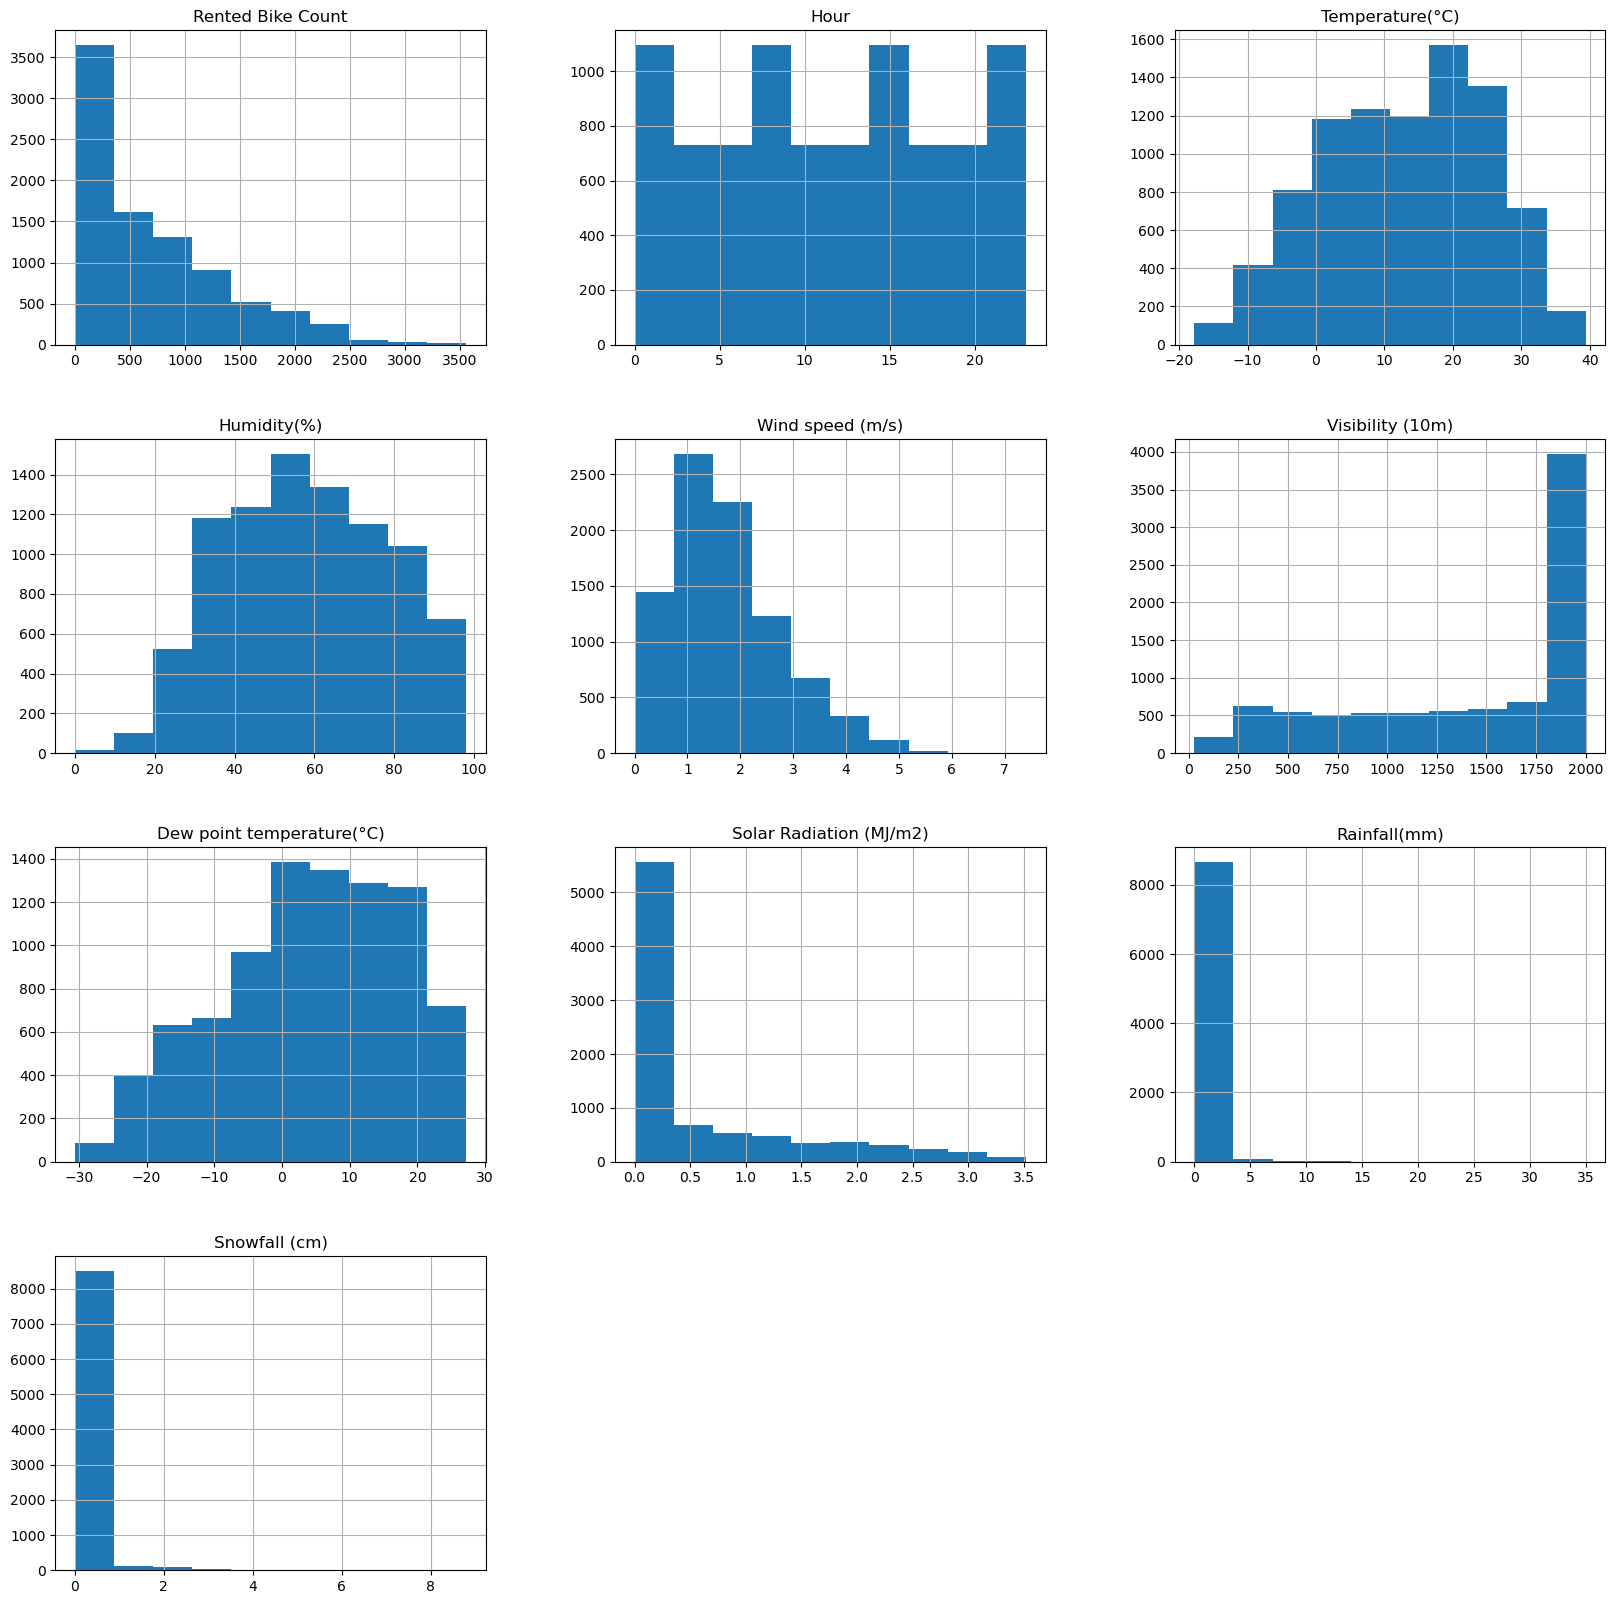

In [50]:
df.hist(figsize=(20,20))
plt.show()

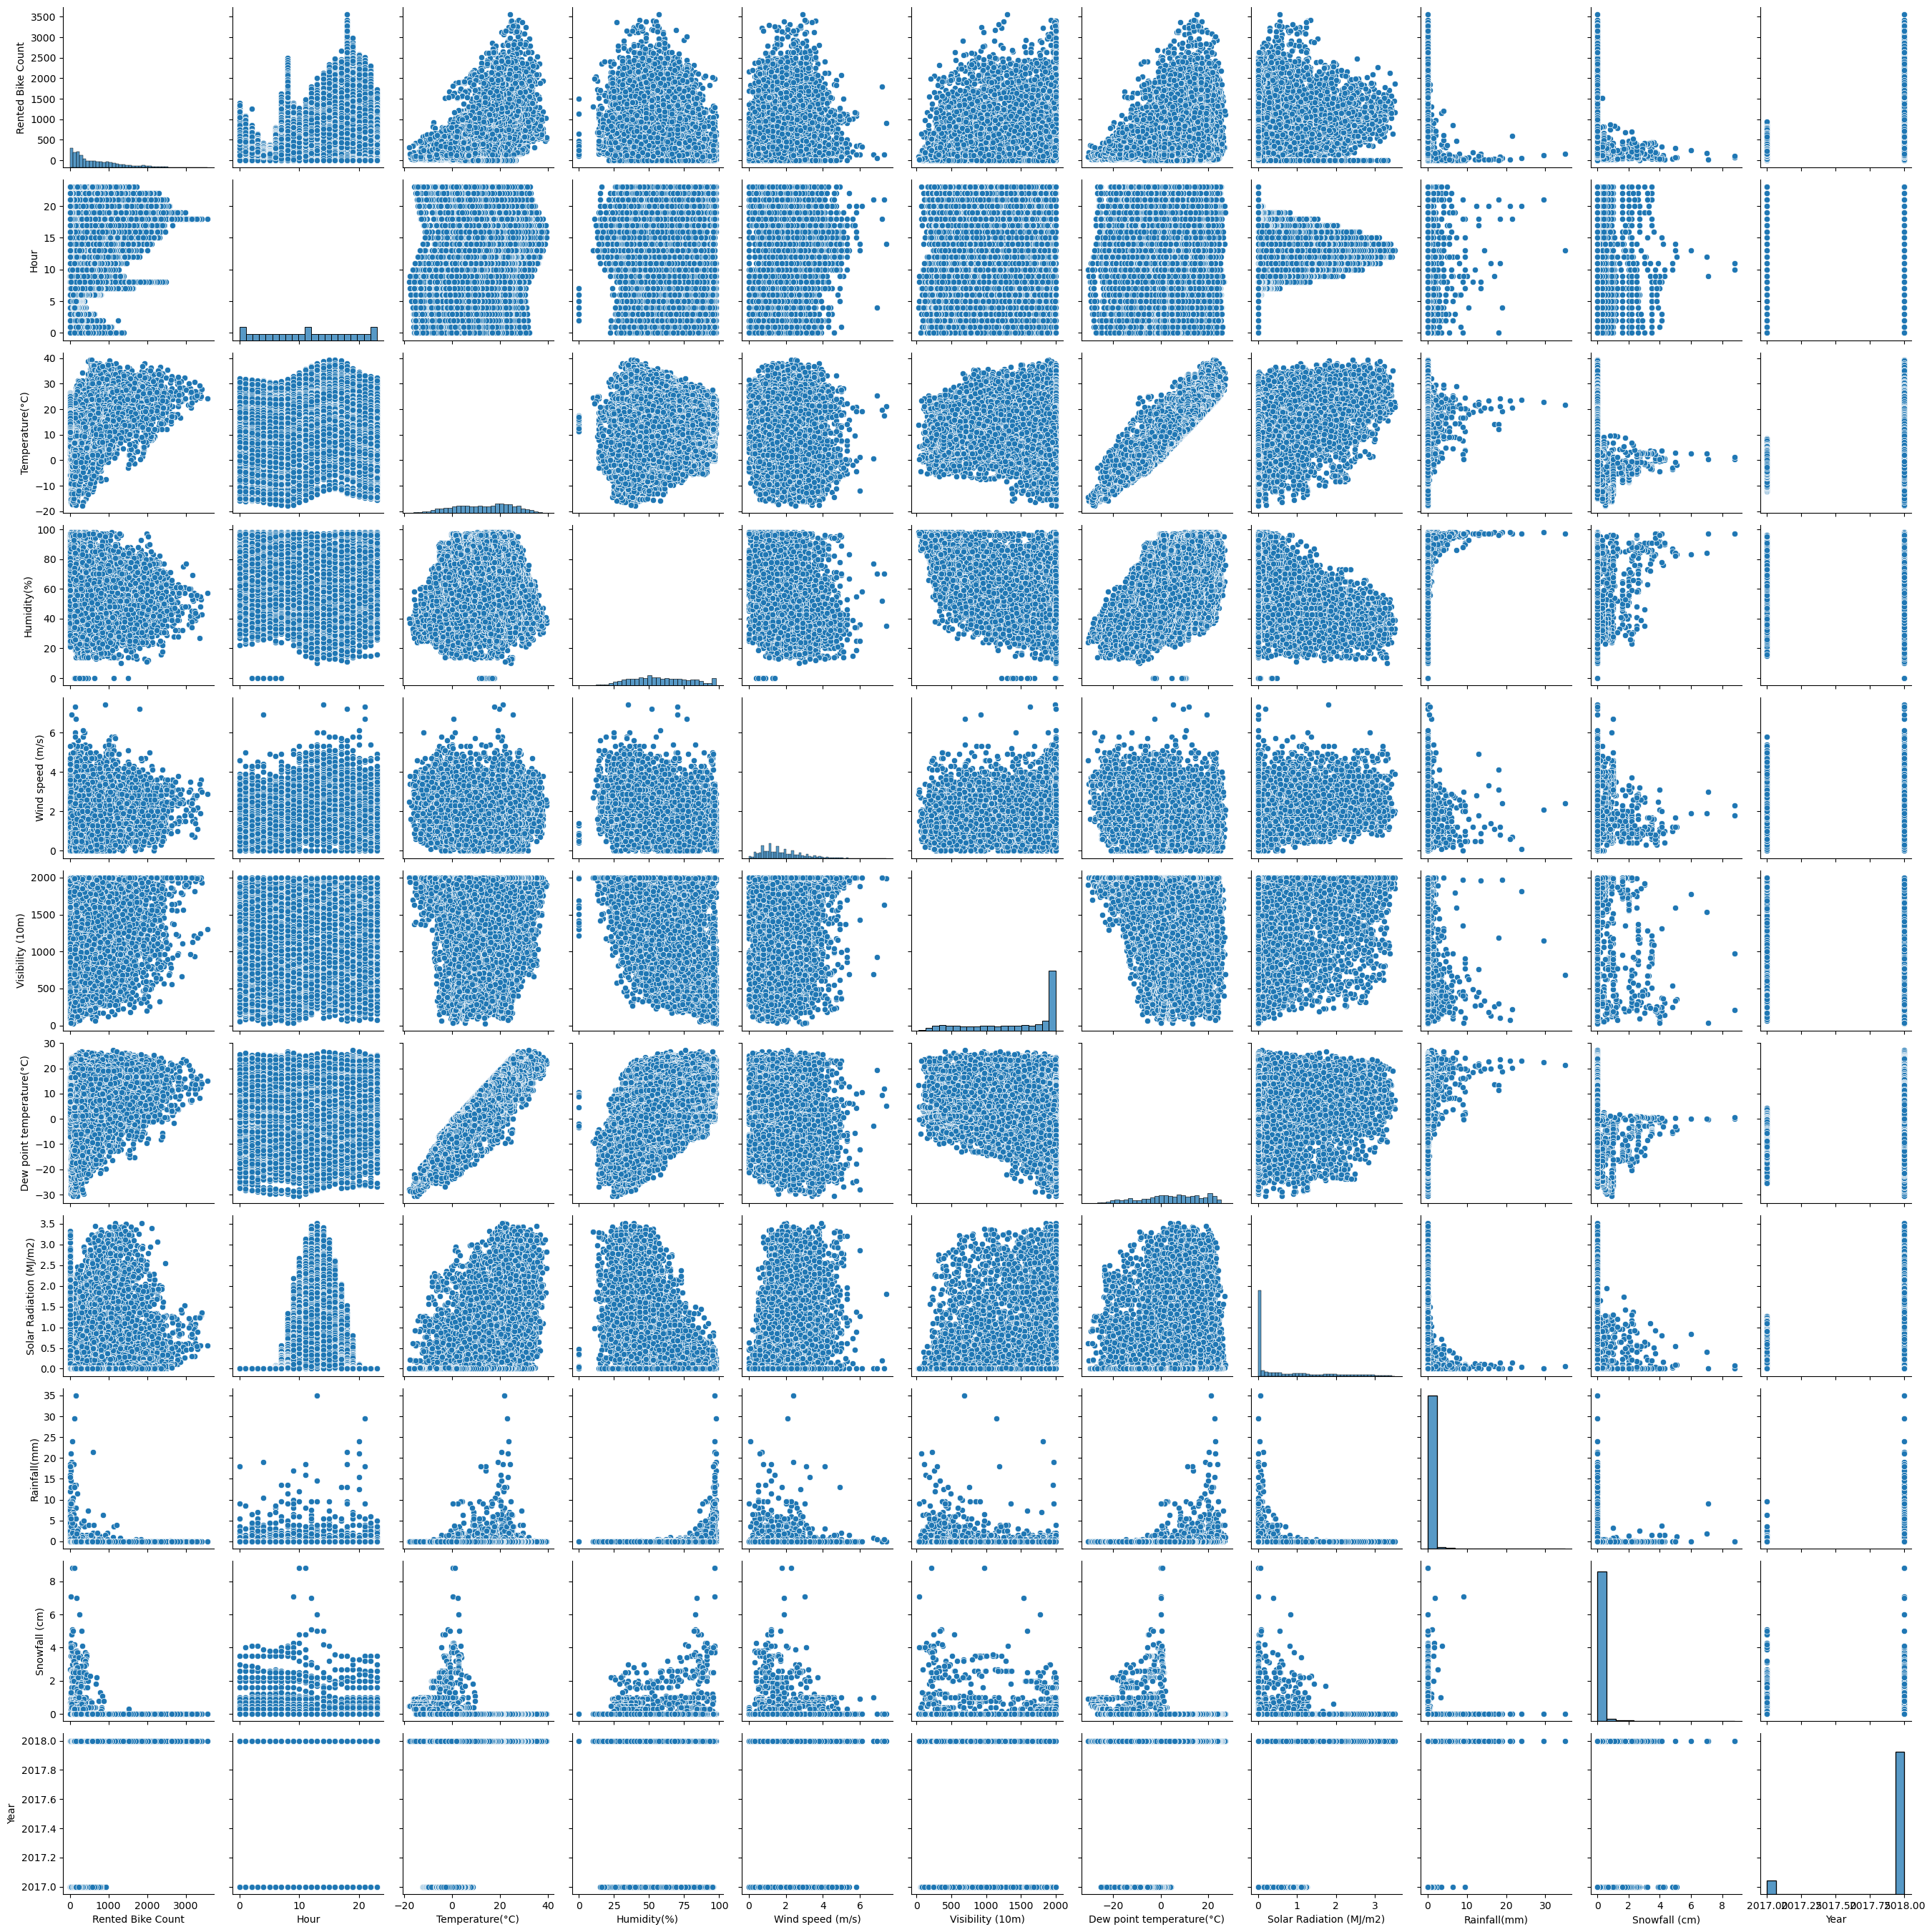

In [51]:
sns.pairplot(df)

In [52]:
def bar_plot(variable):
    var = df[variable]
    varValue = var.value_counts()
    plt.figure(figsize=(15,3))
    plt.bar(varValue.index, varValue,color=['#00008b','#00e5ee','#cd1076', '#008080','#cd5555','red','blue'])
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    
    plt.show()
    print("{}: \n {}".format(variable,varValue))

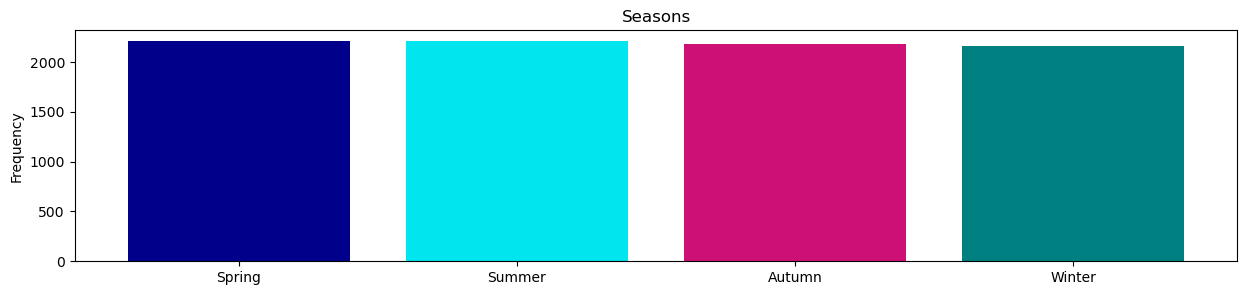

Seasons: 
 Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64


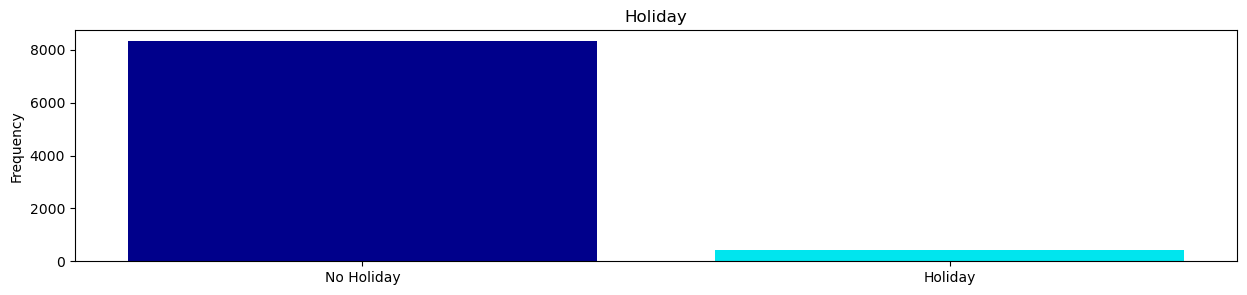

Holiday: 
 Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64


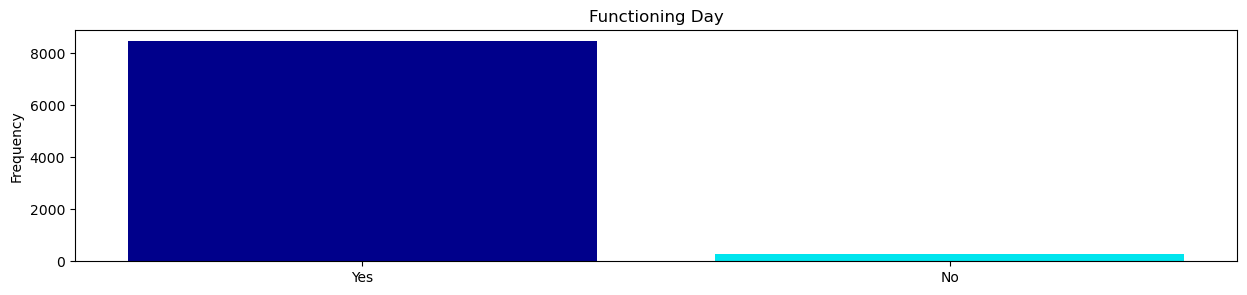

Functioning Day: 
 Functioning Day
Yes    8465
No      295
Name: count, dtype: int64


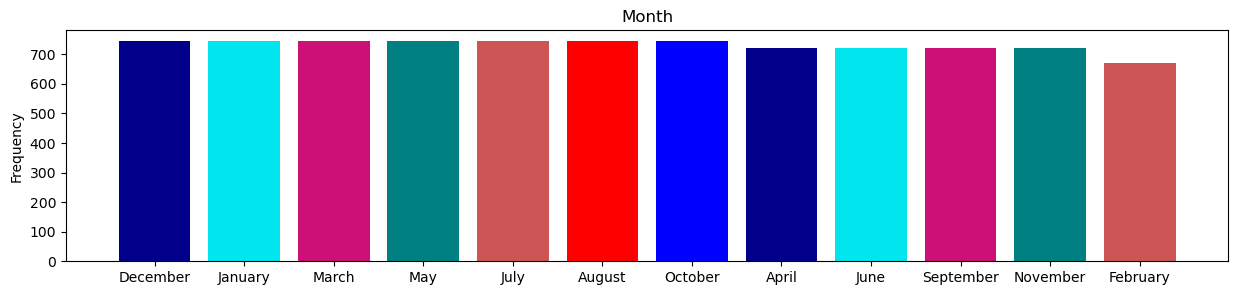

Month: 
 Month
December     744
January      744
March        744
May          744
July         744
August       744
October      744
April        720
June         720
September    720
November     720
February     672
Name: count, dtype: int64


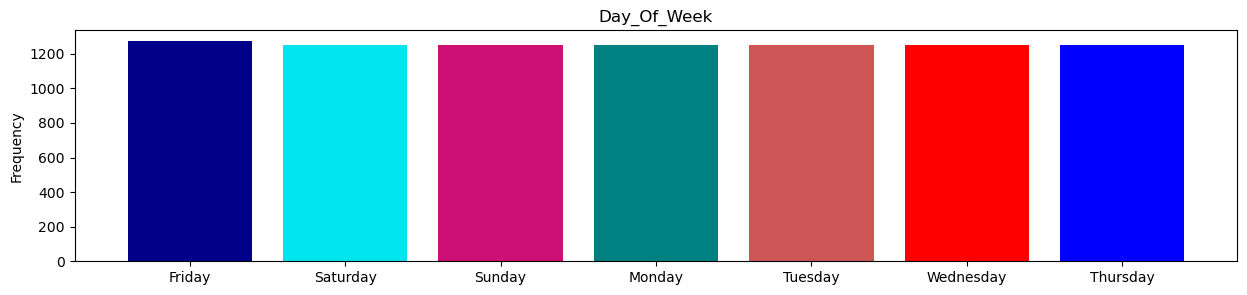

Day_Of_Week: 
 Day_Of_Week
Friday       1272
Saturday     1248
Sunday       1248
Monday       1248
Tuesday      1248
Wednesday    1248
Thursday     1248
Name: count, dtype: int64


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

<Figure size 1500x300 with 1 Axes>

Year: 
 Year
2018    8016
2017     744
Name: count, dtype: int64


In [53]:
categorical_cols = ['Seasons', 'Holiday', 'Functioning Day', 'Month', 'Day_Of_Week', 'Year']
for c in categorical_cols:
    bar_plot(c)

In [54]:
cat_col = ['Seasons', 'Holiday', 'Functioning Day', 'Month', 'Day_Of_Week', 'Year']
num_col = ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 
           'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 
           'Rainfall(mm)', 'Snowfall (cm)']

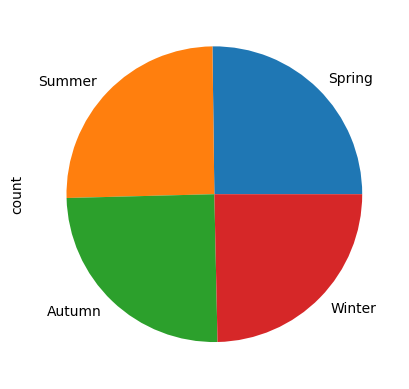

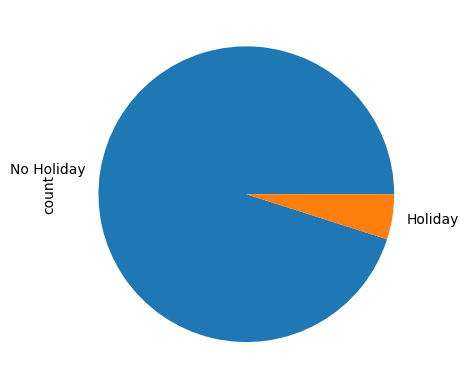

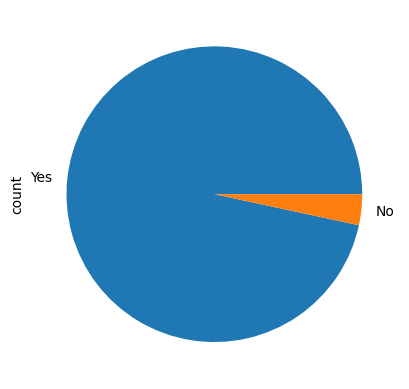

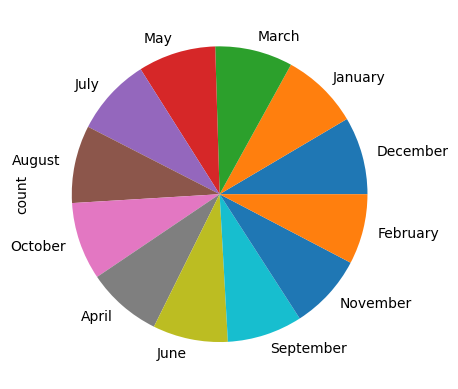

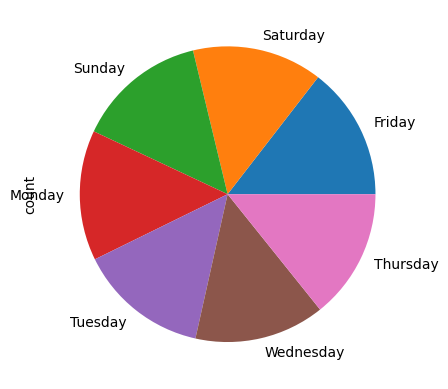

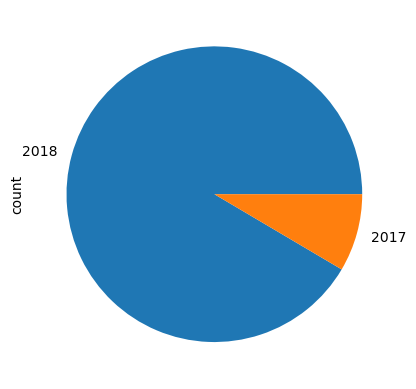

In [55]:
for col in cat_col : 
    plt.figure()
    df[col].value_counts().plot.pie()

In [56]:
def Count_categorcial_variables(df):
    categorcial_variables = df.select_dtypes(include=['object']).columns.tolist()
    #fig = plt.figure(figsize=(14, 18))

    for index, col in enumerate(categorcial_variables):
        print("------------",col," value counts---------------------")
        print(df[col].value_counts())
        #fig.add_subplot(3, 2, index+1)
        #dataframe[col].value_counts()[:20].plot(kind='bar', title=col, color = "royalblue")
        #plt.tight_layout()
        
    print("\n\n------------Number of categories in each columns---------------------")
    for i in categorcial_variables:
        a = df[i].unique()
        print("There are {} categories in {}".format(len(a),i))
Count_categorcial_variables(df)

------------ Seasons  value counts---------------------
Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64
------------ Holiday  value counts---------------------
Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64
------------ Functioning Day  value counts---------------------
Functioning Day
Yes    8465
No      295
Name: count, dtype: int64
------------ Day_Of_Week  value counts---------------------
Day_Of_Week
Friday       1272
Saturday     1248
Sunday       1248
Monday       1248
Tuesday      1248
Wednesday    1248
Thursday     1248
Name: count, dtype: int64
------------ Month  value counts---------------------
Month
December     744
January      744
March        744
May          744
July         744
August       744
October      744
April        720
June         720
September    720
November     720
February     672
Name: count, dtype: int64
------------ Year  value counts---------------------
Year
2018    8016
2017   

# Univariate Analysis

In [57]:
df['Seasons'].value_counts()

Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Seasons'>

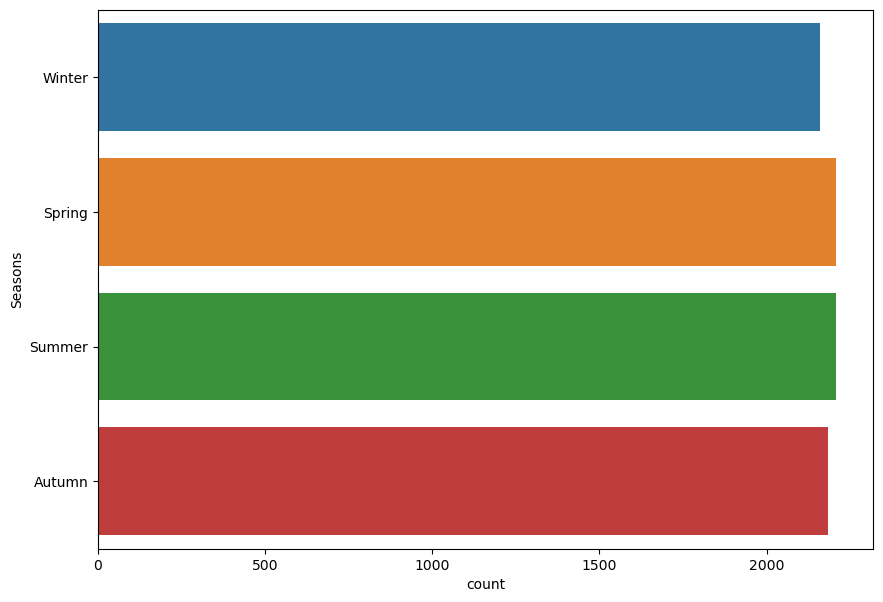

In [58]:
plt.figure(figsize=(10,7))
sns.countplot(y = df['Seasons'])

<Axes: ylabel='count'>

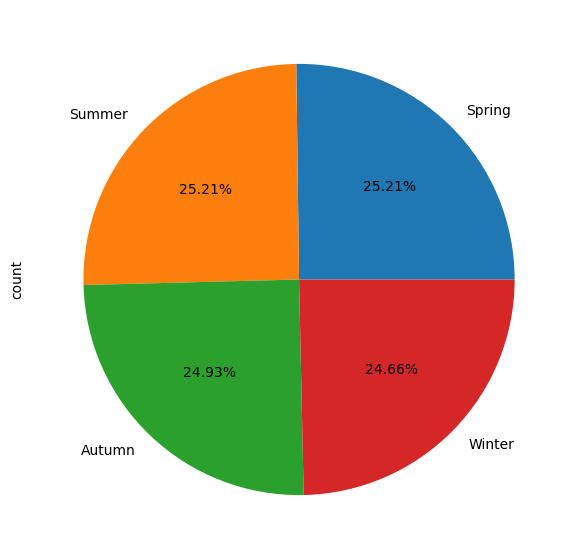

In [59]:
plt.figure(figsize=(10,7))
df['Seasons'].value_counts().plot.pie(autopct="%0.2f%%")

In [60]:
df['Holiday'].value_counts()

Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Holiday'>

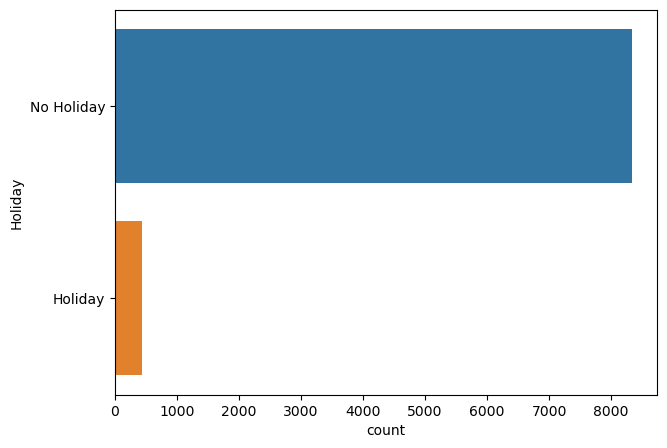

In [61]:
plt.figure(figsize=(7,5))
sns.countplot(y = df['Holiday'])

<Axes: ylabel='count'>

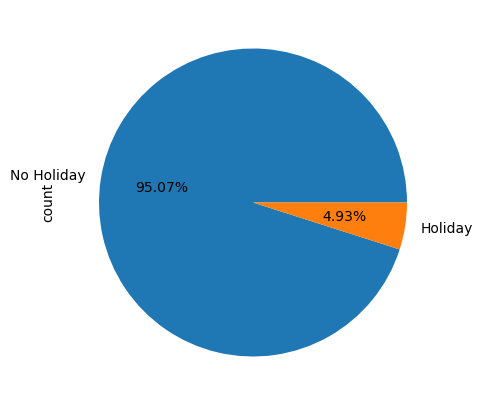

In [62]:
plt.figure(figsize=(7,5))
df['Holiday'].value_counts().plot.pie(autopct="%0.2f%%")

In [63]:
df['Functioning Day'].value_counts()

Functioning Day
Yes    8465
No      295
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Functioning Day'>

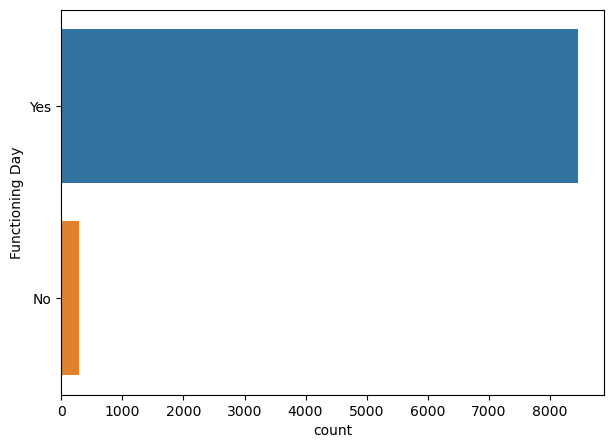

In [64]:
plt.figure(figsize=(7,5))
sns.countplot(y = df['Functioning Day'])

<Axes: ylabel='count'>

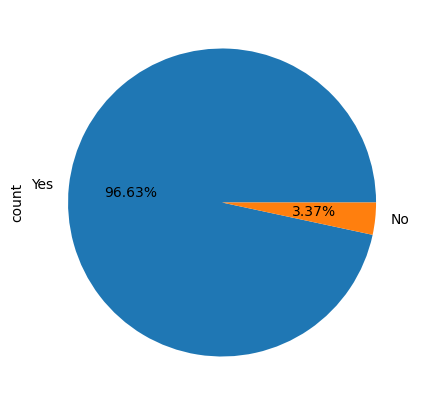

In [65]:
plt.figure(figsize=(7,5))
df['Functioning Day'].value_counts().plot.pie(autopct="%0.2f%%")

In [66]:
df['Day_Of_Week'].value_counts()

Day_Of_Week
Friday       1272
Saturday     1248
Sunday       1248
Monday       1248
Tuesday      1248
Wednesday    1248
Thursday     1248
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Day_Of_Week'>

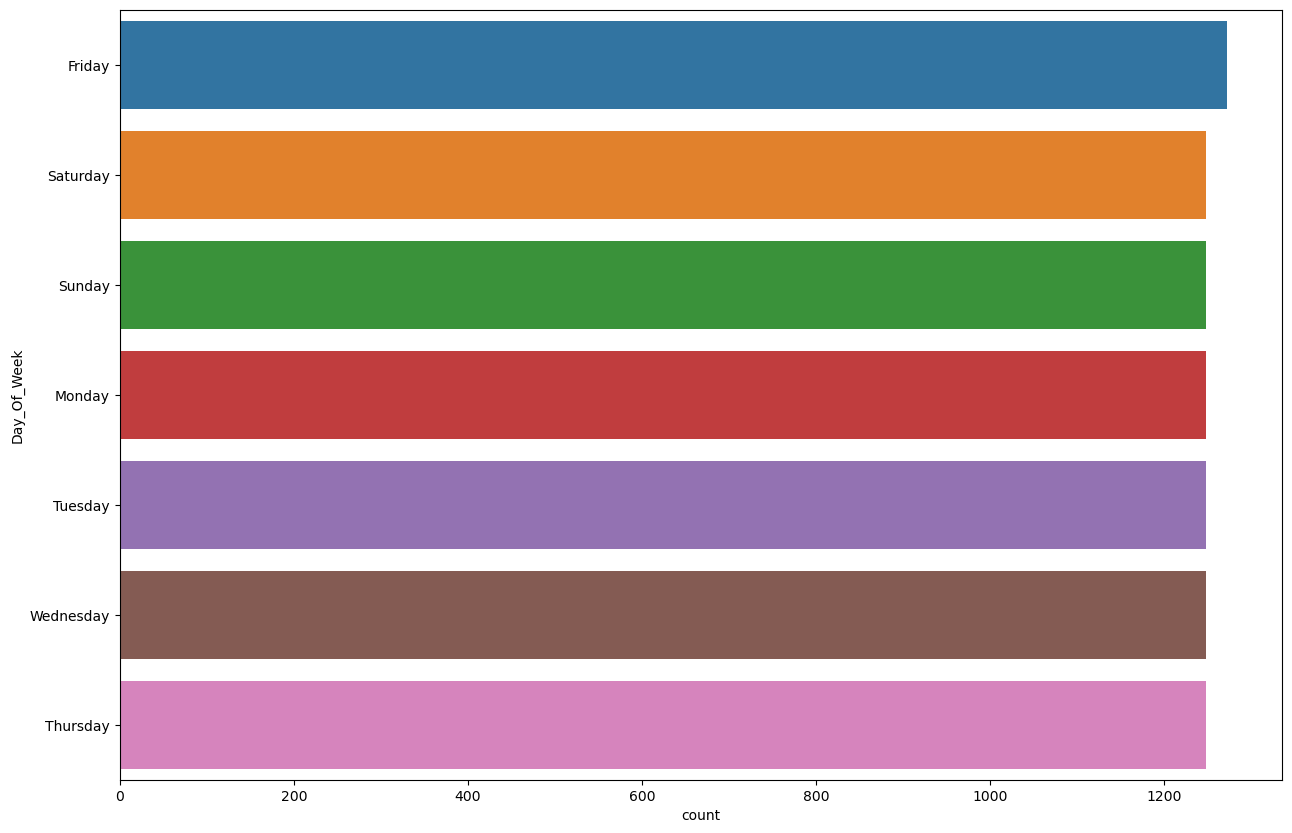

In [67]:
plt.figure(figsize=(15,10))
sns.countplot(y = df['Day_Of_Week'])

<Axes: ylabel='count'>

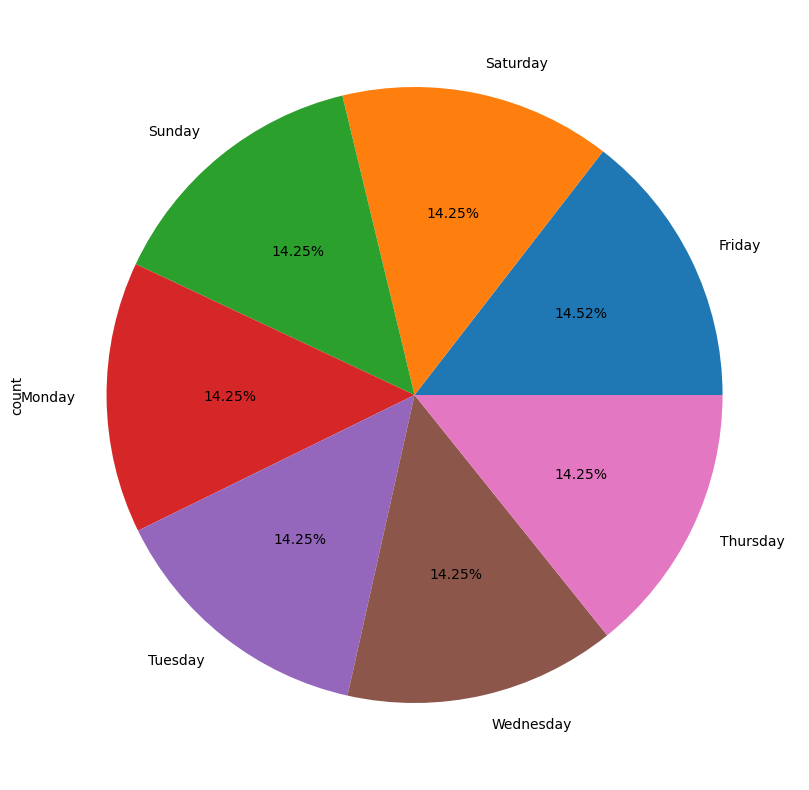

In [68]:
plt.figure(figsize=(10,10))
df['Day_Of_Week'].value_counts().plot.pie(autopct="%0.2f%%")

In [69]:
df['Month'].value_counts()

Month
December     744
January      744
March        744
May          744
July         744
August       744
October      744
April        720
June         720
September    720
November     720
February     672
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Month'>

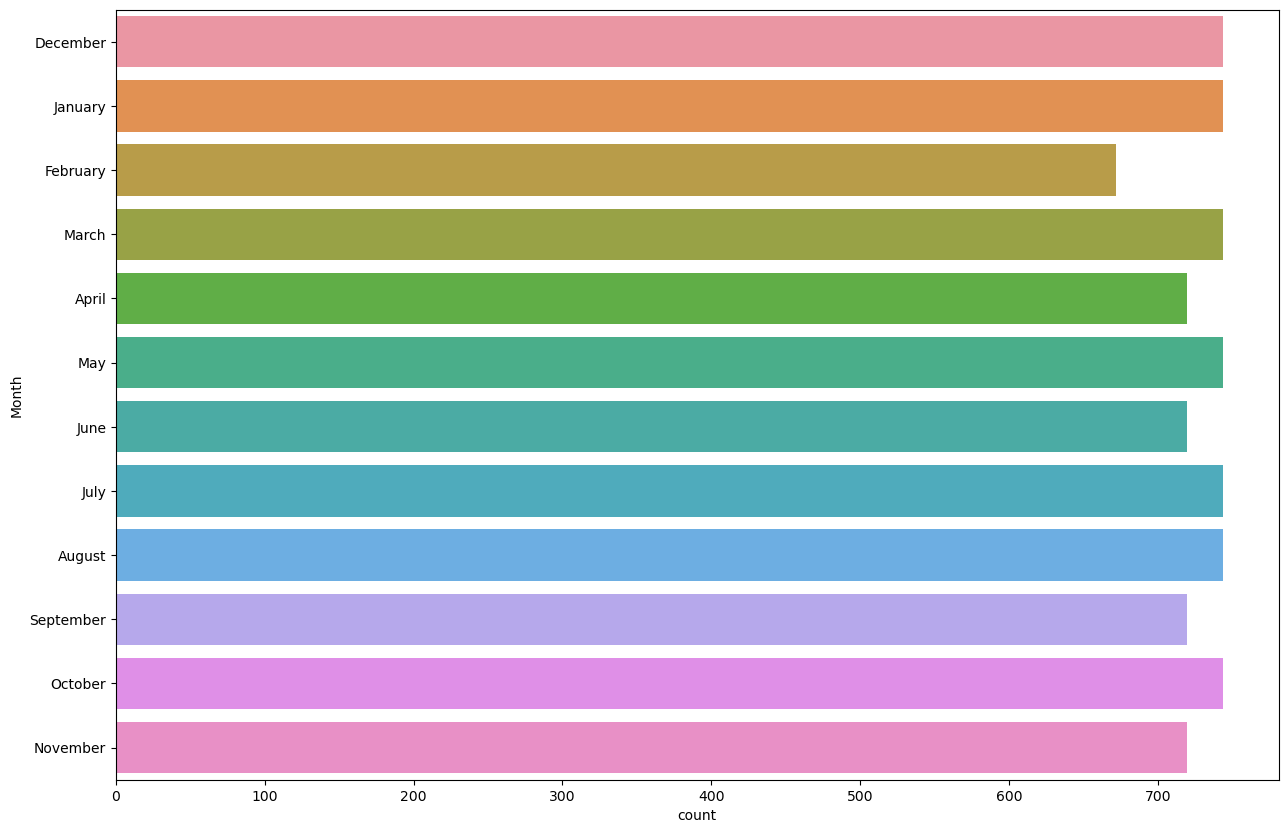

In [70]:
plt.figure(figsize=(15,10))
sns.countplot(y = df['Month'])

<Axes: ylabel='count'>

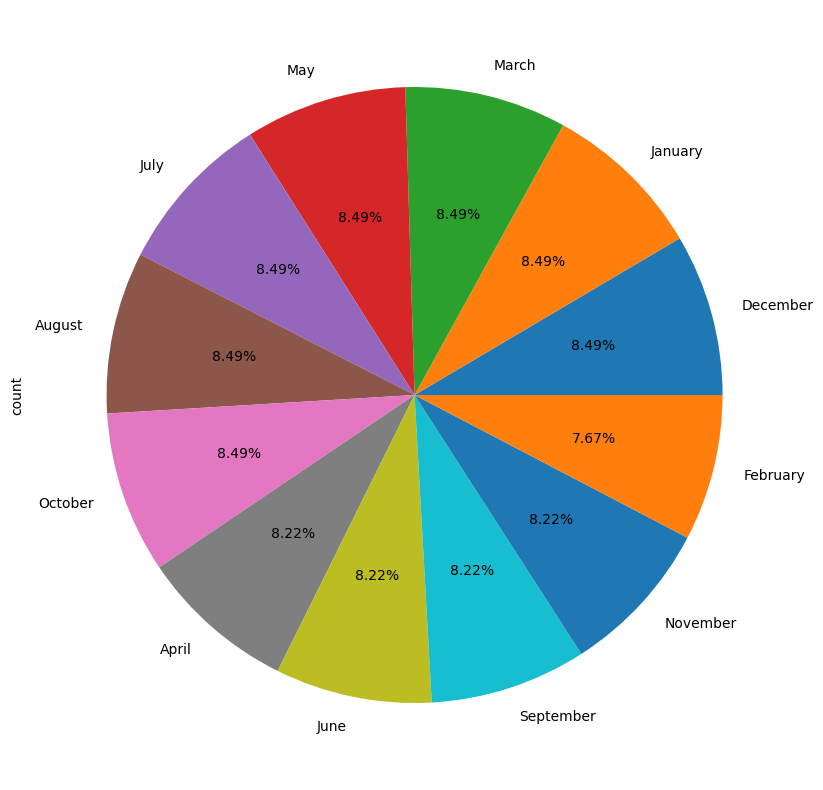

In [71]:
plt.figure(figsize=(10,10))
df['Month'].value_counts().plot.pie(autopct="%0.2f%%")

In [72]:
df['Year'].value_counts()

Year
2018    8016
2017     744
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Year'>

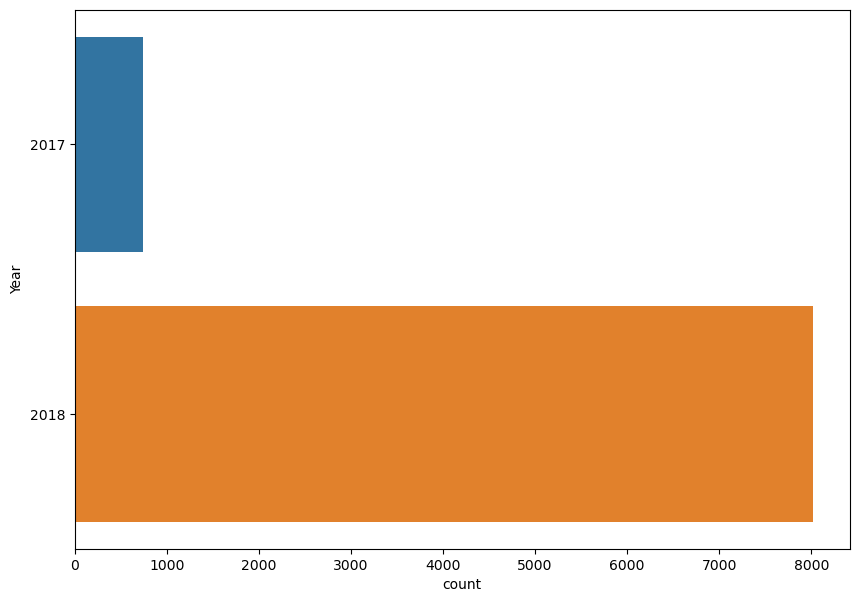

In [73]:
plt.figure(figsize=(10,7))
sns.countplot(y = df['Year'])

<Axes: ylabel='count'>

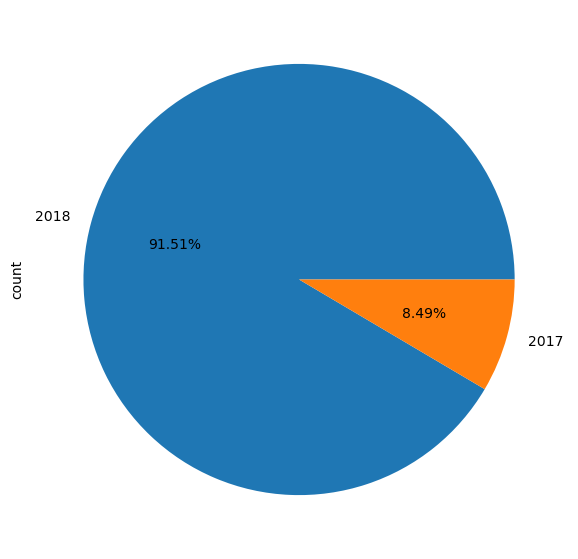

In [74]:
plt.figure(figsize=(10,7))
df['Year'].value_counts().plot.pie(autopct="%0.2f%%")

# Tree Map

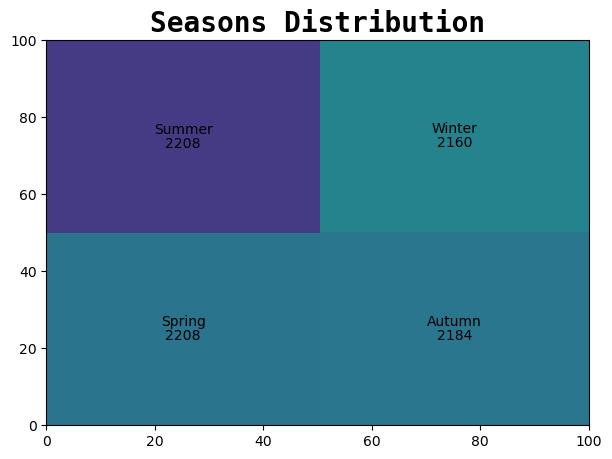

In [75]:
seasons = df['Seasons'].value_counts()

plt.style.use('default')
plt.figure(figsize = (7, 5))
squarify.plot(sizes = seasons.values, label = seasons.index, value = seasons.values)
plt.title('Seasons Distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 
                                              'fontweight' : 'bold'})
plt.show()

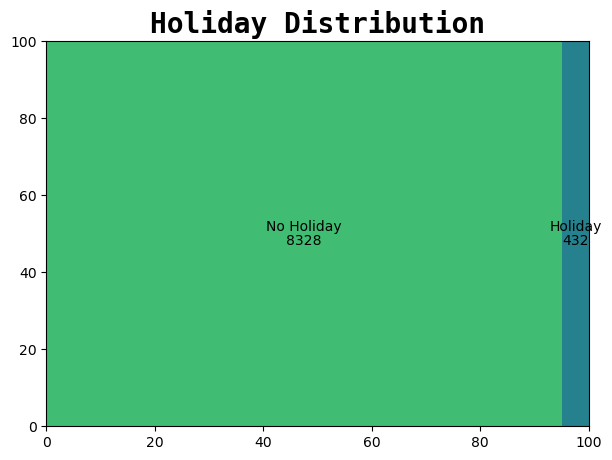

In [76]:
holiday = df['Holiday'].value_counts()

plt.style.use('default')
plt.figure(figsize = (7, 5))
squarify.plot(sizes = holiday.values, label = holiday.index, value = holiday.values)
plt.title('Holiday Distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 
                                              'fontweight' : 'bold'})
plt.show()

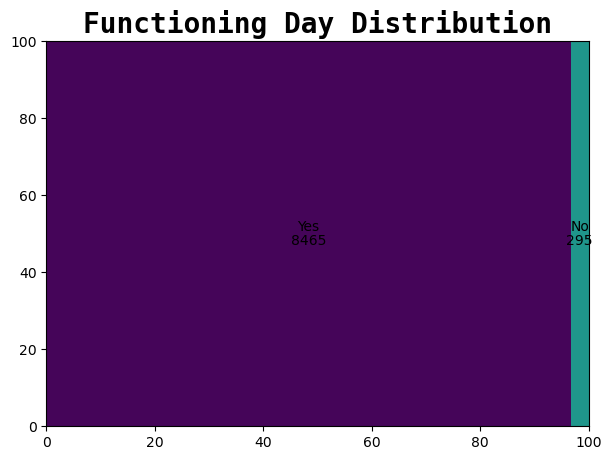

In [77]:
functioning_day = df['Functioning Day'].value_counts()

plt.style.use('default')
plt.figure(figsize = (7, 5))
squarify.plot(sizes = functioning_day.values, label = functioning_day.index, 
              value = functioning_day.values)
plt.title('Functioning Day Distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 
                                                      'fontweight' : 'bold'})
plt.show()

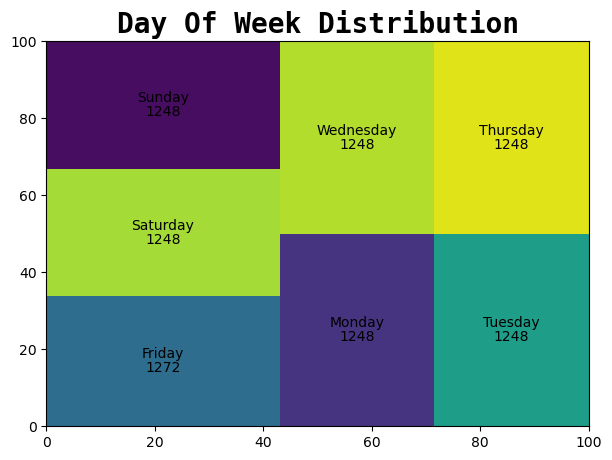

In [78]:
day_of_week = df['Day_Of_Week'].value_counts()

plt.style.use('default')
plt.figure(figsize = (7, 5))
squarify.plot(sizes = day_of_week.values, label = day_of_week.index, value = day_of_week.values)
plt.title('Day Of Week Distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 
                                              'fontweight' : 'bold'})
plt.show()

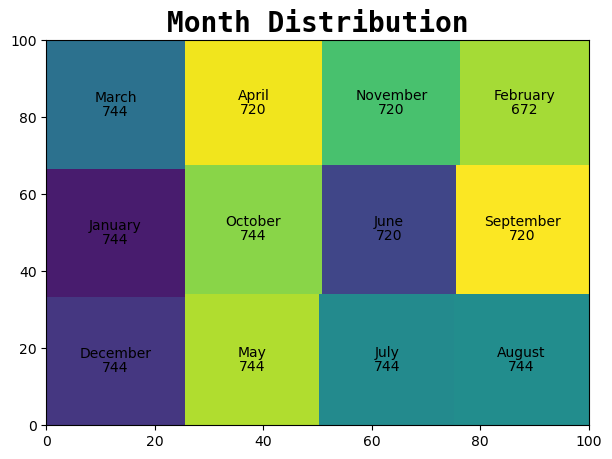

In [79]:
month = df['Month'].value_counts()

plt.style.use('default')
plt.figure(figsize = (7, 5))
squarify.plot(sizes = month.values, label = month.index, value = month.values)
plt.title('Month Distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 
                                              'fontweight' : 'bold'})
plt.show()

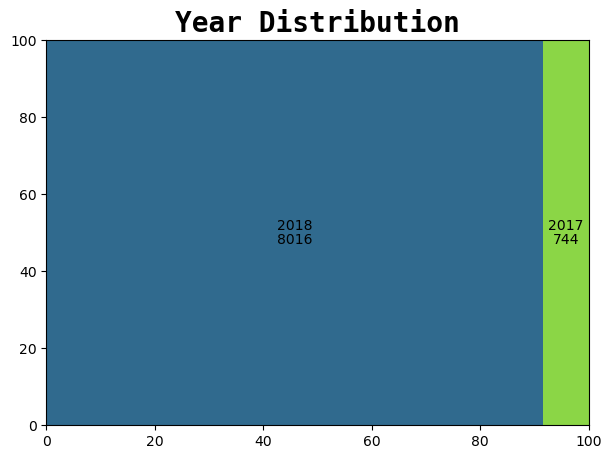

In [80]:
year = df['Year'].value_counts()

plt.style.use('default')
plt.figure(figsize = (7, 5))
squarify.plot(sizes = year.values, label = year.index, value = year.values)
plt.title('Year Distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 
                                              'fontweight' : 'bold'})
plt.show()

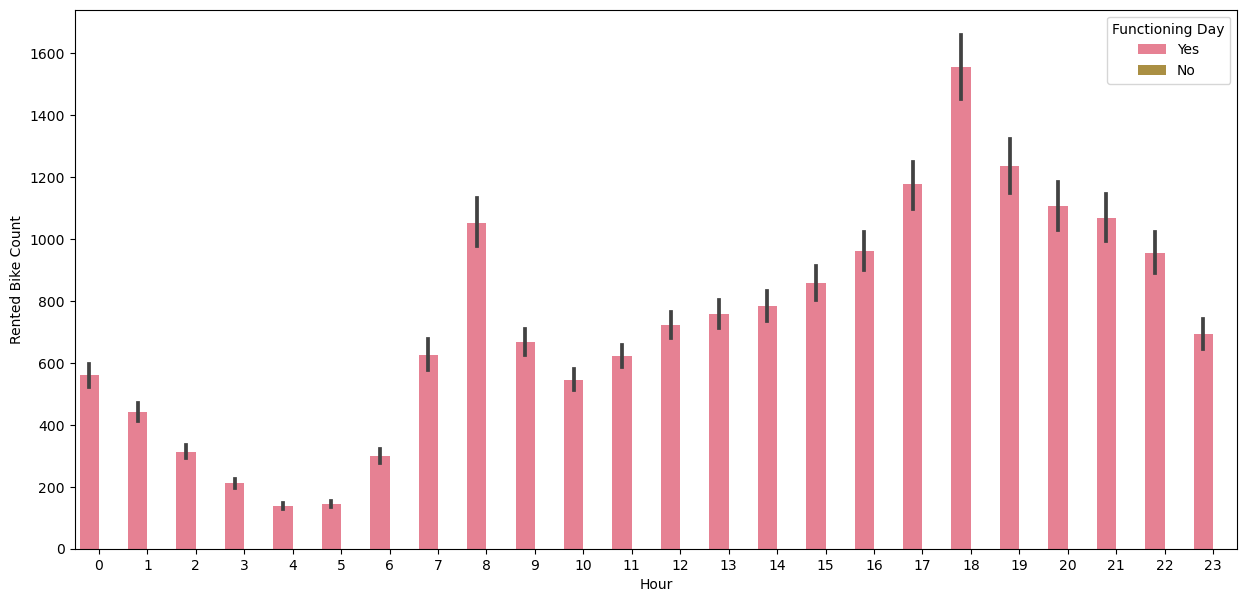

In [81]:
def barplots(x,y,hue):
    plt.figure(figsize=(15,7))
    sns.set_palette("husl")
    sns.barplot(x = x,y = y,hue = hue,data = df);
barplots('Hour','Rented Bike Count','Functioning Day')

In [82]:
# Converting days of weeks in Two variable from Monaday to Friday in Weekdays and Saturday and Sunday to Weekend
df['week'] = df['Day_Of_Week'].apply(lambda x:'Weekend'  if x=='Saturday' or  x== 'Sunday' else 'Weekdays')

In [83]:
# value counts of Week column
df.week.value_counts()

week
Weekdays    6264
Weekend     2496
Name: count, dtype: int64

Text(0.5, 1.0, 'Rented Bike Count during weekday and weekend with respect of Hour')

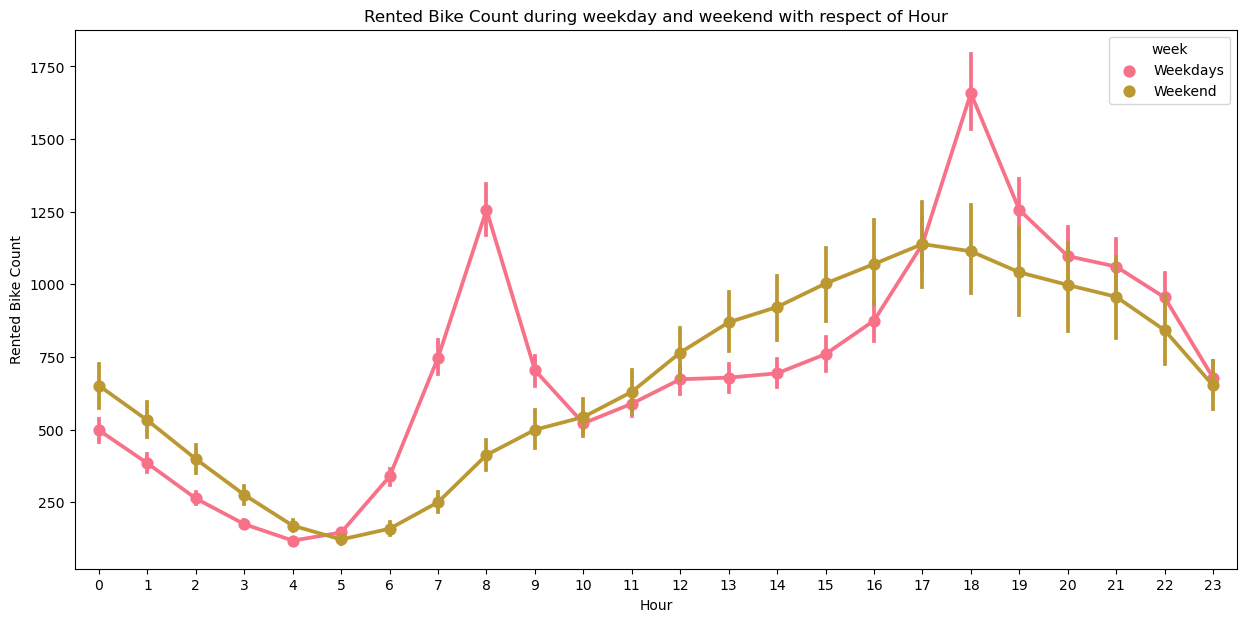

In [84]:
# Getting feel of week column with pointplot  
plt.figure(figsize=(15,7))
sns.pointplot(x=df["Hour"],y=df['Rented Bike Count'],hue=df['week'])
plt.title("Rented Bike Count during weekday and weekend with respect of Hour")

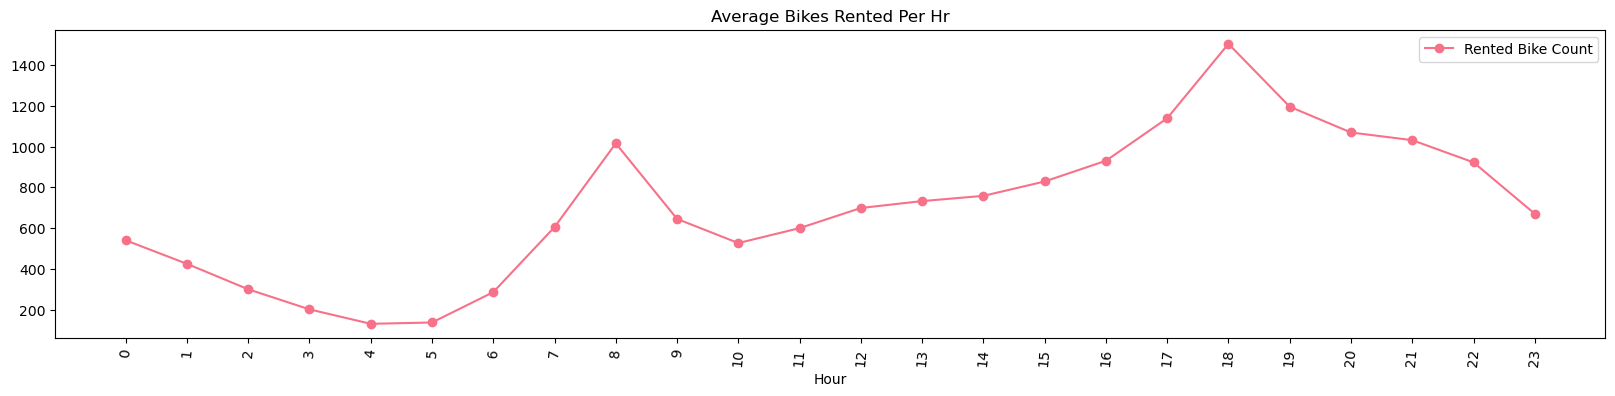

In [85]:
#ploting line graph
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = df.groupby('Hour')['Rented Bike Count'].mean()

# plot average rent over time(hrs)
plt.figure(figsize = (20,4))
a = avg_rent_hrs.plot(legend = True,marker = 'o',title = "Average Bikes Rented Per Hr")
a.set_xticks(range(len(avg_rent_hrs)));
a.set_xticklabels(avg_rent_hrs.index.tolist(), rotation = 85);

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month ')]

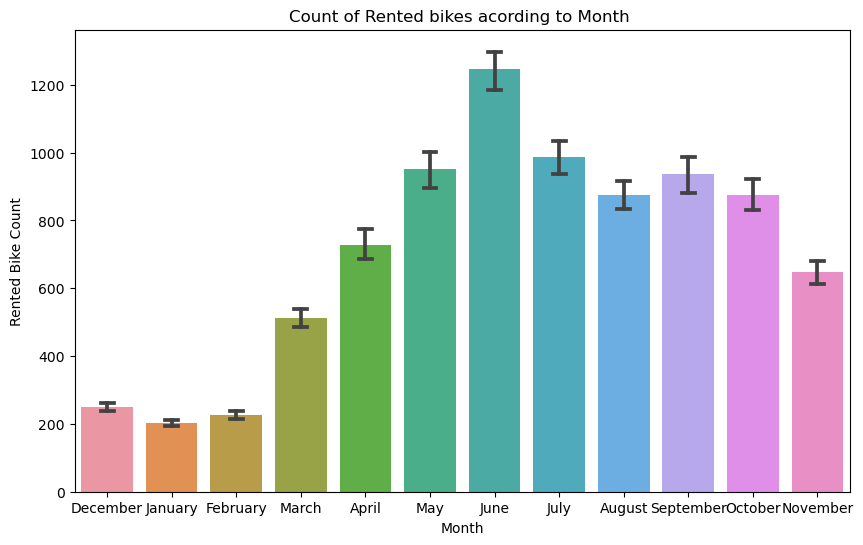

In [86]:
#data vizualisation for coulmn month with respect to our dependent variable "Rented Bike Count"
fig,ax = plt.subplots(figsize = (10,6))
sns.barplot(data = df,x = 'Month',y = 'Rented Bike Count',ax = ax,capsize = 0.2)
ax.set(title = 'Count of Rented bikes acording to Month ')

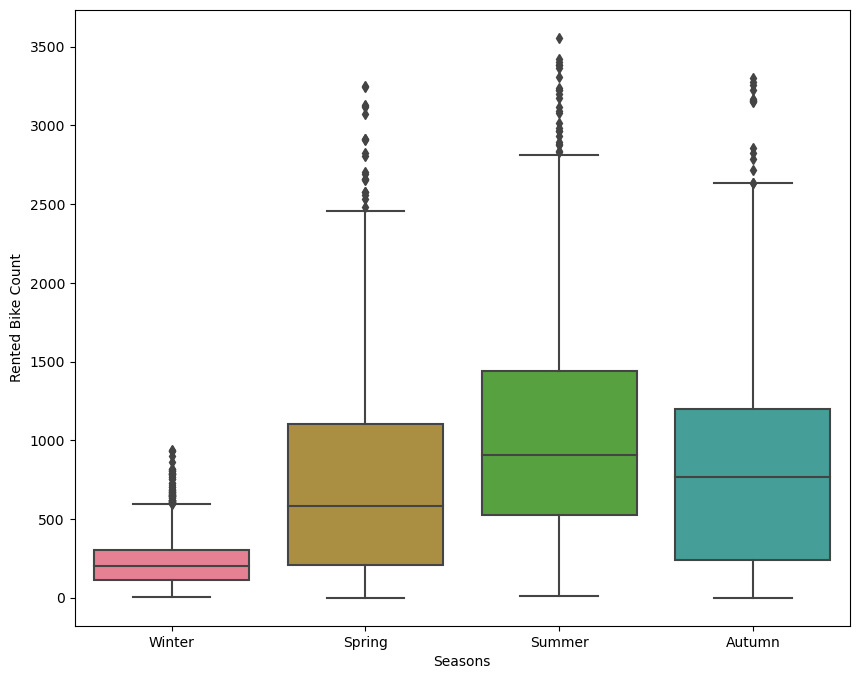

In [87]:
plt.figure(figsize=(10,8))
sns.boxplot(x = df["Seasons"],y = df["Rented Bike Count"])
plt.show()

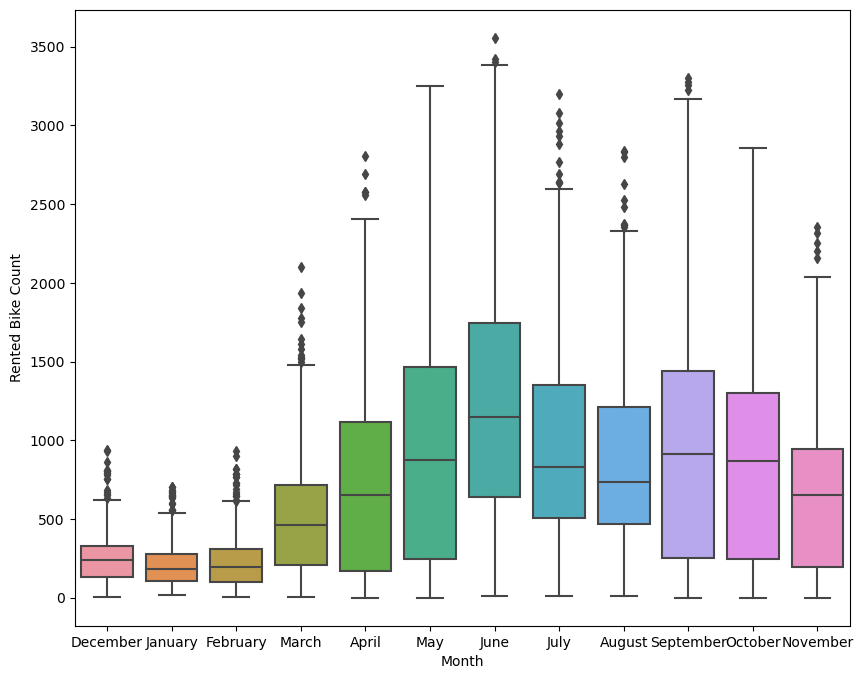

In [88]:
plt.figure(figsize=(10,8))
sns.boxplot(x = df["Month"],y = df["Rented Bike Count"])
plt.show()

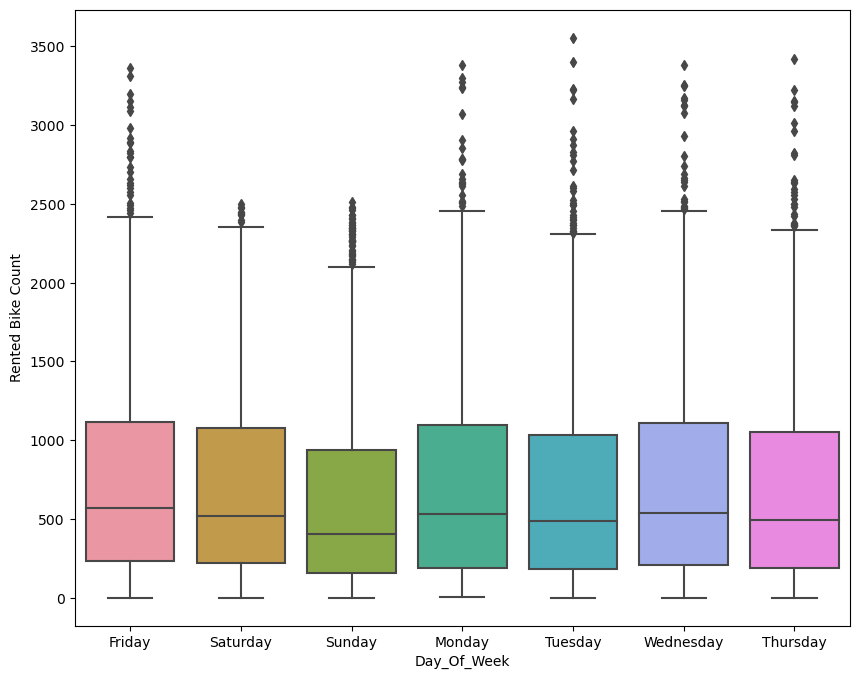

In [89]:
plt.figure(figsize=(10,8))
sns.boxplot(x = df["Day_Of_Week"],y = df["Rented Bike Count"])
plt.show()

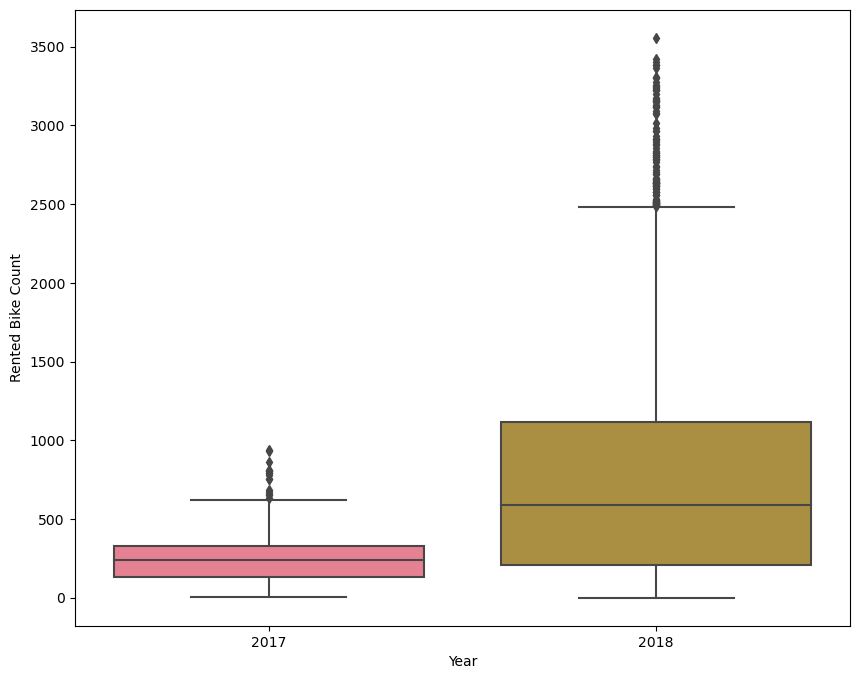

In [90]:
plt.figure(figsize=(10,8))
sns.boxplot(x = df["Year"],y = df["Rented Bike Count"])
plt.show()

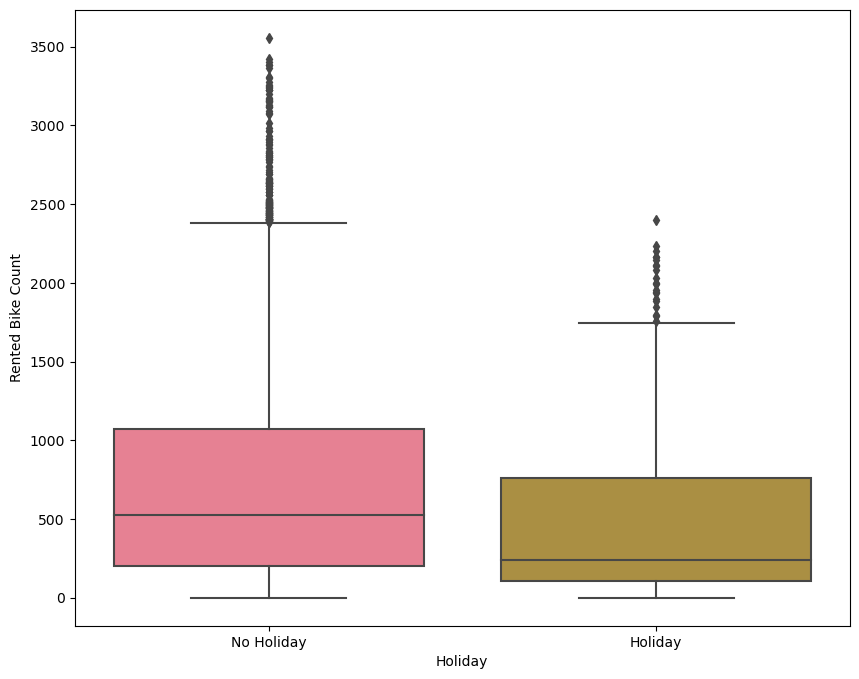

In [91]:
plt.figure(figsize=(10,8))
sns.boxplot(x = df["Holiday"],y = df["Rented Bike Count"])
plt.show()

In [92]:
df['Seasons'] = df['Seasons'].map({'Winter': 0, 'Spring': 1, 'Summer': 2, 'Autumn': 3})
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  Seasons     Holiday Functioning Day  \
0           0.0            0.0        0  No Holiday             Yes   
1           0.0            0.0        0  No Holiday             Yes   
2           0.0            0.0        0  No Holiday             Yes   
3           0.0            0.0        0  No Holiday             Yes   
4           0.0            0.0        0  No Holiday             Yes   

  Day_Of_Week     Month  Year      week  
0      Friday  December  2017  Weekdays  
1      Friday  December  2017  Weekdays  
2      Friday  December  2017  Weekdays  
3      Friday  December  2017  Weekdays  
4      Friday  December  2017  Weekdays

In [93]:
df['Holiday'] = df['Holiday'].map({'No Holiday': 0, 'Holiday': 1})
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  Seasons  Holiday Functioning Day Day_Of_Week  \
0           0.0            0.0        0        0             Yes      Friday   
1           0.0            0.0        0        0             Yes      Friday   
2           0.0            0.0        0        0             Yes      Friday   
3           0.0            0.0        0        0             Yes      Friday   
4           0.0            0.0        0        0             Yes      Friday   

      Month  Year      week  
0  December  2017  Weekdays  
1  December  2017  Weekdays  
2  December  2017  Weekdays  
3  December  2017  Weekdays  
4  December  2017  Weekdays

In [94]:
df['Functioning Day'] = df['Functioning Day'].map({'Yes': 0, 'No': 1})
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  Seasons  Holiday  Functioning Day Day_Of_Week  \
0           0.0            0.0        0        0                0      Friday   
1           0.0            0.0        0        0                0      Friday   
2           0.0            0.0        0        0                0      Friday   
3           0.0            0.0        0        0                0      Friday   
4           0.0            0.0        0        0                0      Friday   

      Month  Year      week  
0  December  2017  Weekdays  
1  December  2017  Weekdays  
2  December  2017  Weekdays  
3  December  2017  Weekdays  
4  December  2017  Weekdays

In [95]:
df['Day_Of_Week'] = df['Day_Of_Week'].map({'Friday': 0, 'Saturday': 1, 'Sunday': 2, 'Monday': 3, 
                                           'Tuesday': 4, 'Wednesday': 5, 'Thursday': 6})
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  Seasons  Holiday  Functioning Day  \
0           0.0            0.0        0        0                0   
1           0.0            0.0        0        0                0   
2           0.0            0.0        0        0                0   
3           0.0            0.0        0        0                0   
4           0.0            0.0        0        0                0   

   Day_Of_Week     Month  Year      week  
0            0  December  2017  Weekdays  
1            0  December  2017  Weekdays  
2            0  December  2017  Weekdays  
3            0  December  2017  Weekdays  
4            0  December  2017  Weekdays

In [96]:
df['Month'] = df['Month'].map({'December': 0, 'January': 1, 'February': 2, 'March': 3, 
                               'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 
                               'September': 9, 'October': 10, 'November': 11})
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  Seasons  Holiday  Functioning Day  \
0           0.0            0.0        0        0                0   
1           0.0            0.0        0        0                0   
2           0.0            0.0        0        0                0   
3           0.0            0.0        0        0                0   
4           0.0            0.0        0        0                0   

   Day_Of_Week  Month  Year      week  
0            0      0  2017  Weekdays  
1            0      0  2017  Weekdays  
2            0      0  2017  Weekdays  
3            0      0  2017  Weekdays  
4            0      0  2017  Weekdays

In [97]:
df['week'] = df['week'].map({'Weekdays': 0, 'Weekend': 1})
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  Seasons  Holiday  Functioning Day  \
0           0.0            0.0        0        0                0   
1           0.0            0.0        0        0                0   
2           0.0            0.0        0        0                0   
3           0.0            0.0        0        0                0   
4           0.0            0.0        0        0                0   

   Day_Of_Week  Month  Year  week  
0            0      0  2017     0  
1            0      0  2017     0  
2            0      0  2017     0  
3            0      0  2017     0  
4            0      0  2017     0

# Training and Testing Data

In [98]:
# Train - Spliting  data
X = df.drop(['Rented Bike Count'],axis = 1)
y = np.sqrt(df['Rented Bike Count'])
X.shape

(8760, 16)

In [99]:
#spliting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [100]:
#creating list of matrix to store the evaluation matrix of all model
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
adj_r2_list=[]

In [101]:
# making a function to train and evaluate linear model
def train_linear_model (model,X_train,y_train,X_test,y_test):

#training the model
  model.fit(X_train,y_train)

  #predicting the values
  pred = model.predict(X_test)
  import math
  from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

  print('\n================Evalution Matrix=========================\n')

  #finding mean_squared_error
  MSE  = mean_squared_error(y_test**2,pred**2)
  print("MSE :" , MSE)

  #finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  #finding the r2 score
  r2 = r2_score(y_test**2,pred**2)
  print("R2 :" ,r2)
  #finding the adjusted r2 score
  adj_r2=1-(1-r2_score(y_test**2,pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)
  
  print('\n================Evalution Matrix=========================\n')
  

#appending metrice to list
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)
    
  # ploting the line graph of actual and predicted values
  print('\
  =========================================================\
  Evalution Graph\
  ===================================================\n')  
  plt.figure(figsize=(20,10))
  plt.plot((pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()

In [102]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    import math
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import r2_score
    print('\n================Evalution Matrix=========================\n')
    MSE  = mean_squared_error(y_test,preds)
    print("MSE :" , MSE)
    
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)
    r2 = r2_score(y_test,preds)
    print("R2 :" ,r2)
    adj_r2=1-(1-r2_score(y_test,preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2)

    train_class_preds = linear_model.predict(X_train)

    print('\n================Evalution Matrix=========================\n')

    mean_sq_error.append(MSE)
    root_mean_sq_error.append(RMSE)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)

    #ploting 
    print('\
    =========================================================\
    Evalution Graph\
    ===================================================\n') 
    plt.figure(figsize=(20,10))
    plt.plot(np.array(y_test[:100]))
    plt.plot(preds[:100])    
    plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
    plt.show()

In [103]:
def get_features_importance (optimal_model,X_train):
  '''
  shows the graph of feature importance
  '''
  features = X_train.columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(15,10))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()


================Evalution Matrix=========================

MSE : 176645.4287801679
RMSE : 420.29207556194524
R2 : 0.5703450575141575
Adjusted R2 :  0.5671814684300465

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



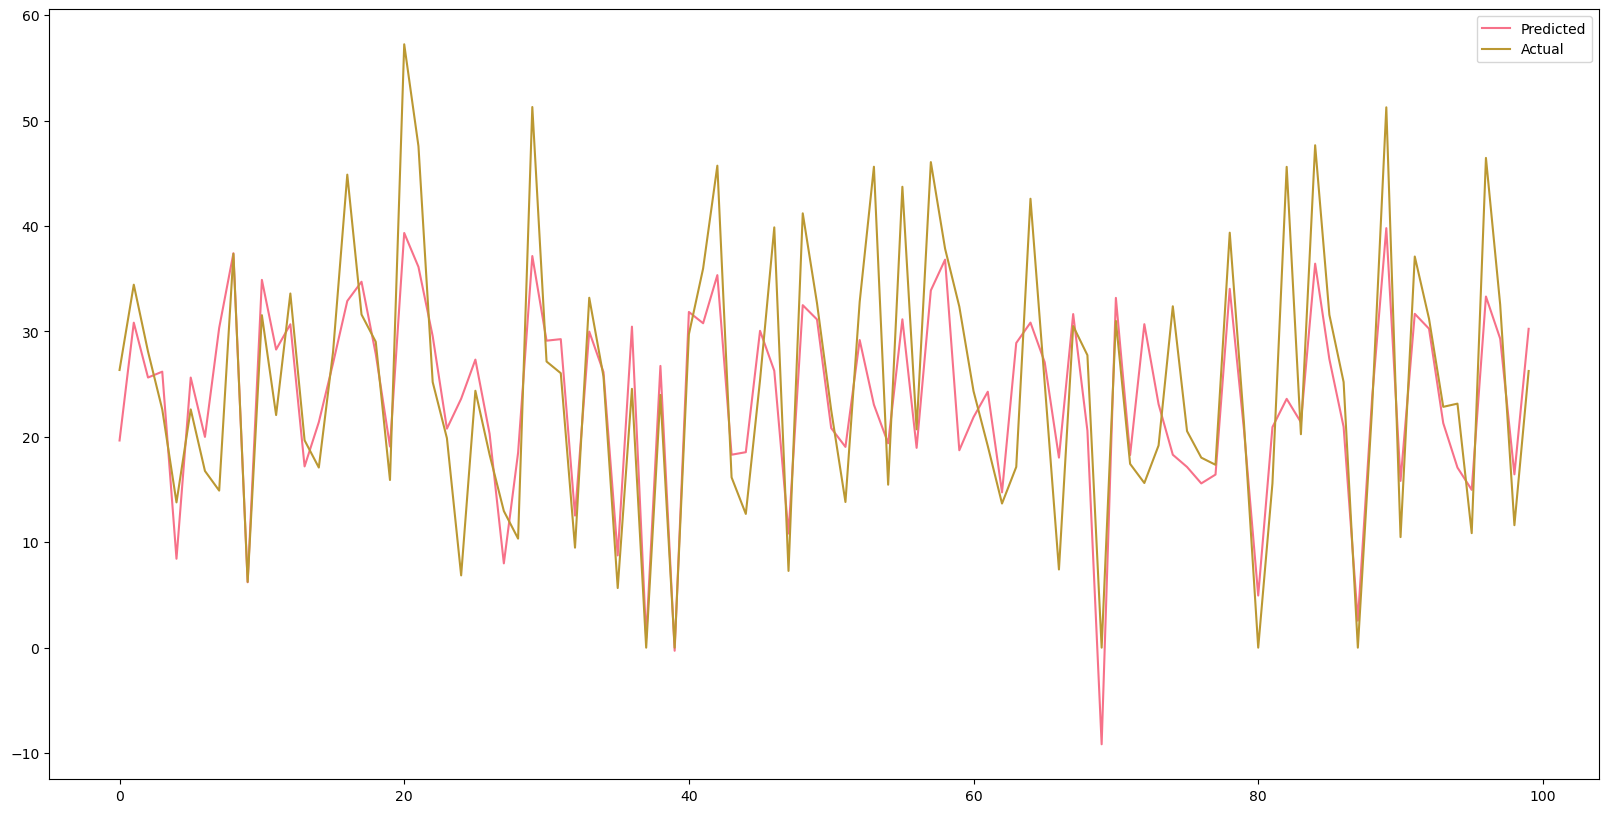

In [104]:
#linear regression model

linear_model= LinearRegression()
train_linear_model(linear_model, X_train, y_train, X_test, y_test)

# Lasso Regression

In [105]:
# finding the best parameters for lasso by gridsearchcv
from sklearn.model_selection import GridSearchCV
lasso_model = Lasso()
#setting the parameters of the lasso model
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_grid = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=5)


================Evalution Matrix=========================

MSE : 177077.3925913212
RMSE : 420.80564705255705
R2 : 0.5692943912856643
Adjusted R2 :  0.5661230660489274

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



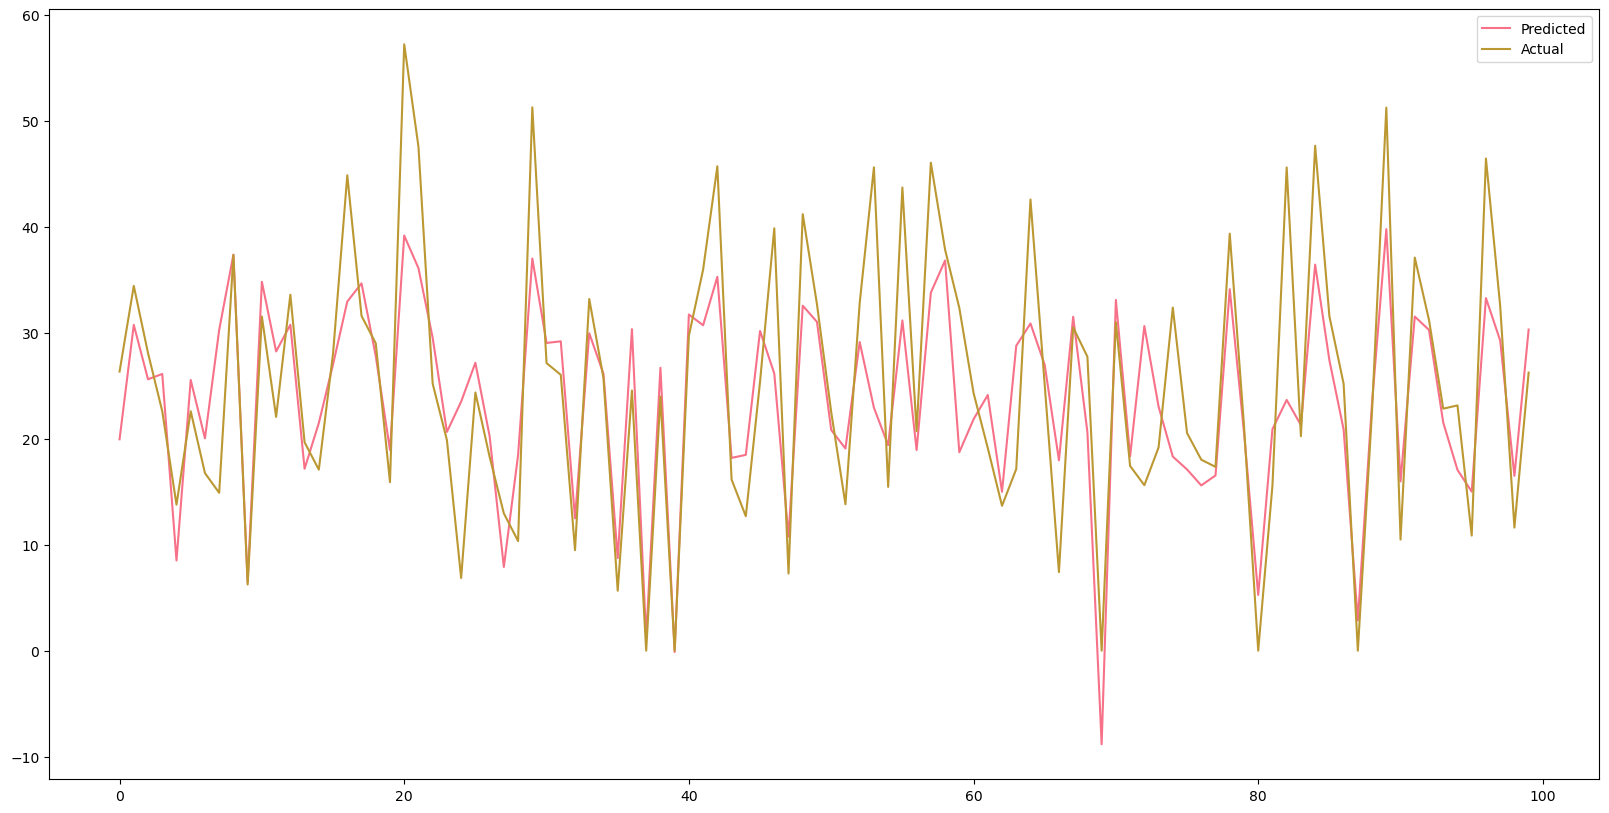

In [106]:
# calling train_linear_model to train,fit and evalution of lasso model
train_linear_model(lasso_grid,X_train,y_train,X_test,y_test)

# Ridge Regression

In [107]:
ridge = Ridge()

# finding the best parameters for ridge model by gridsearchcv

parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_grid = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)


================Evalution Matrix=========================

MSE : 176699.5217379442
RMSE : 420.3564222632315
R2 : 0.5702134871314835
Adjusted R2 :  0.5670489292824745

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



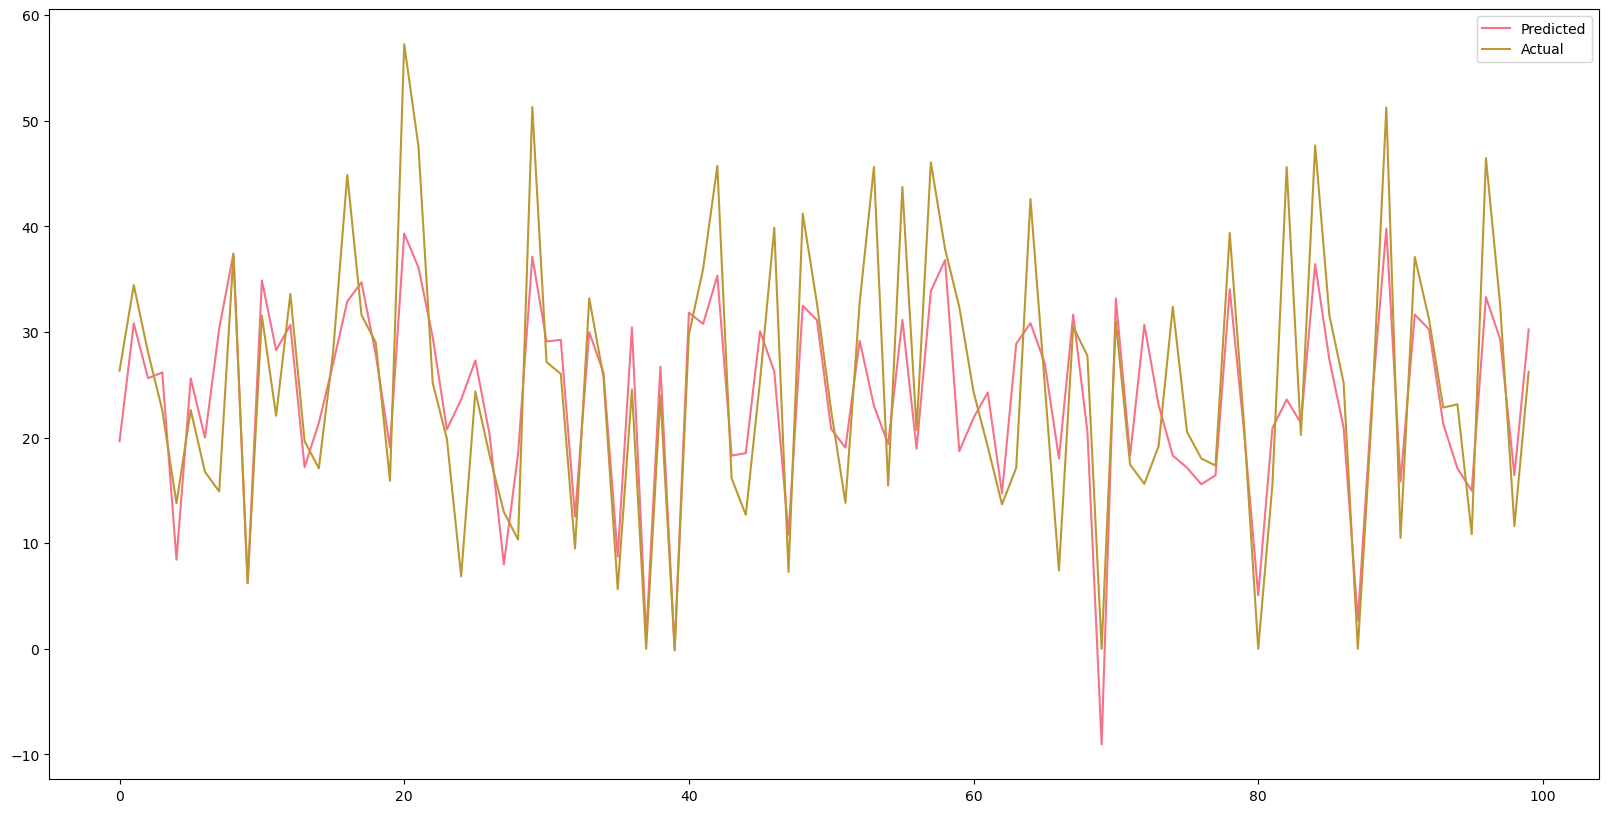

In [108]:
# calling train_linear_model to train,fit and evalution of ridge model

train_linear_model(ridge_grid,X_train,y_train,X_test,y_test)

# ElasticNet Regression

In [109]:
elastic = ElasticNet()

# finding the best parameters for ridge model by gridsearchcv

parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5]}
elastic_grid = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)


================Evalution Matrix=========================

MSE : 176677.1331112196
RMSE : 420.32979089188956
R2 : 0.5702679430219875
Adjusted R2 :  0.5671037861367375

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



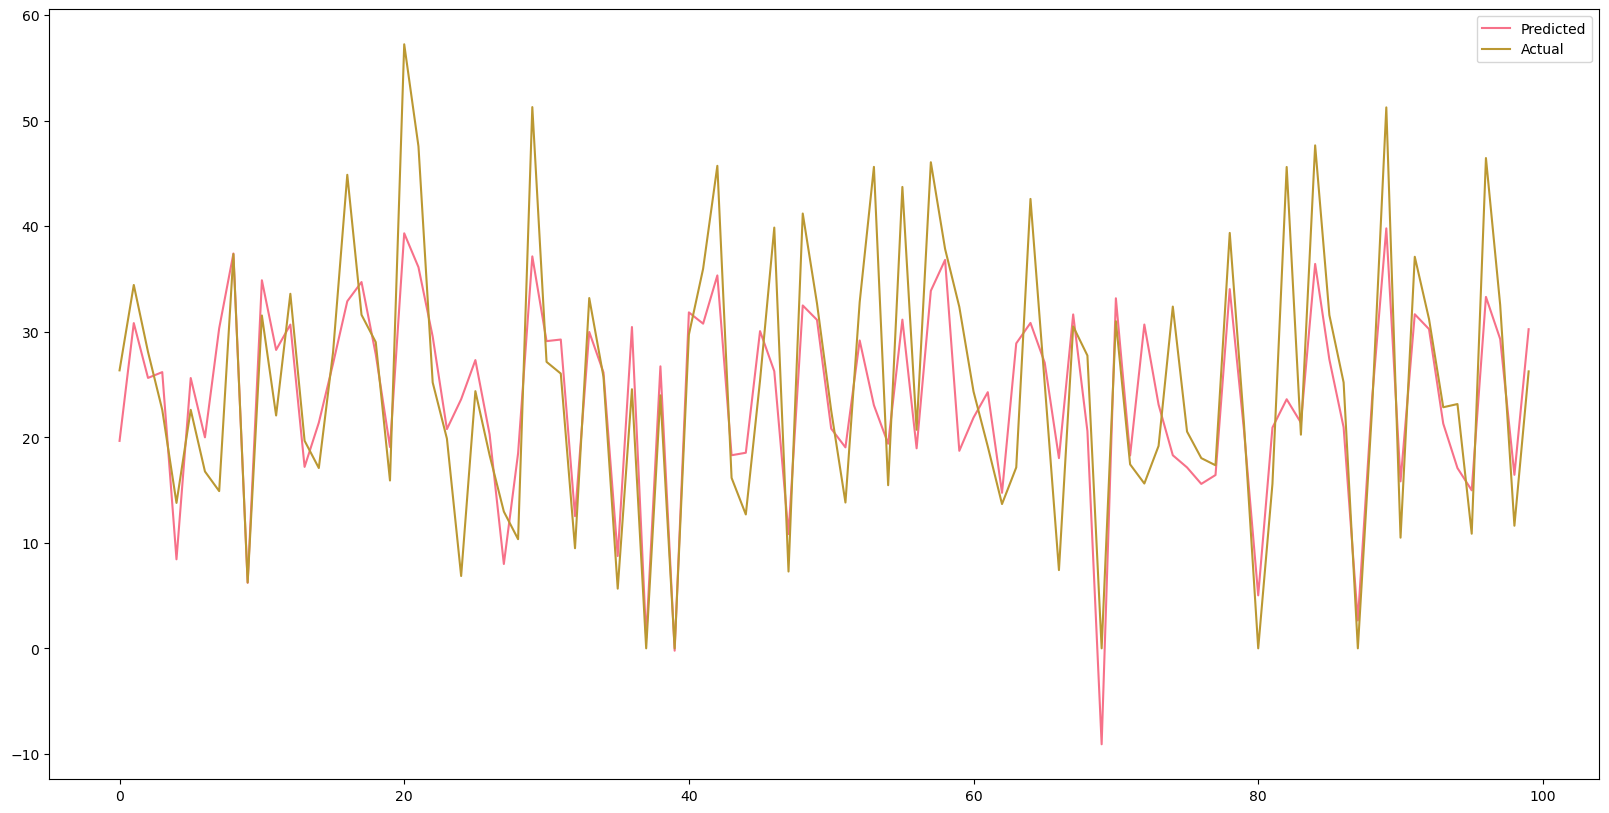

In [110]:
# calling train_linear_model to train,fit and evalution of elasticnet model
train_linear_model(elastic_grid,X_train,y_train,X_test,y_test)

# Polynomial Regression

In [111]:
pipe=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())


================Evalution Matrix=========================

MSE : 120709.45484639736
RMSE : 347.4326623194736
R2 : 0.7063982111641884
Adjusted R2 :  0.7042363940351627

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



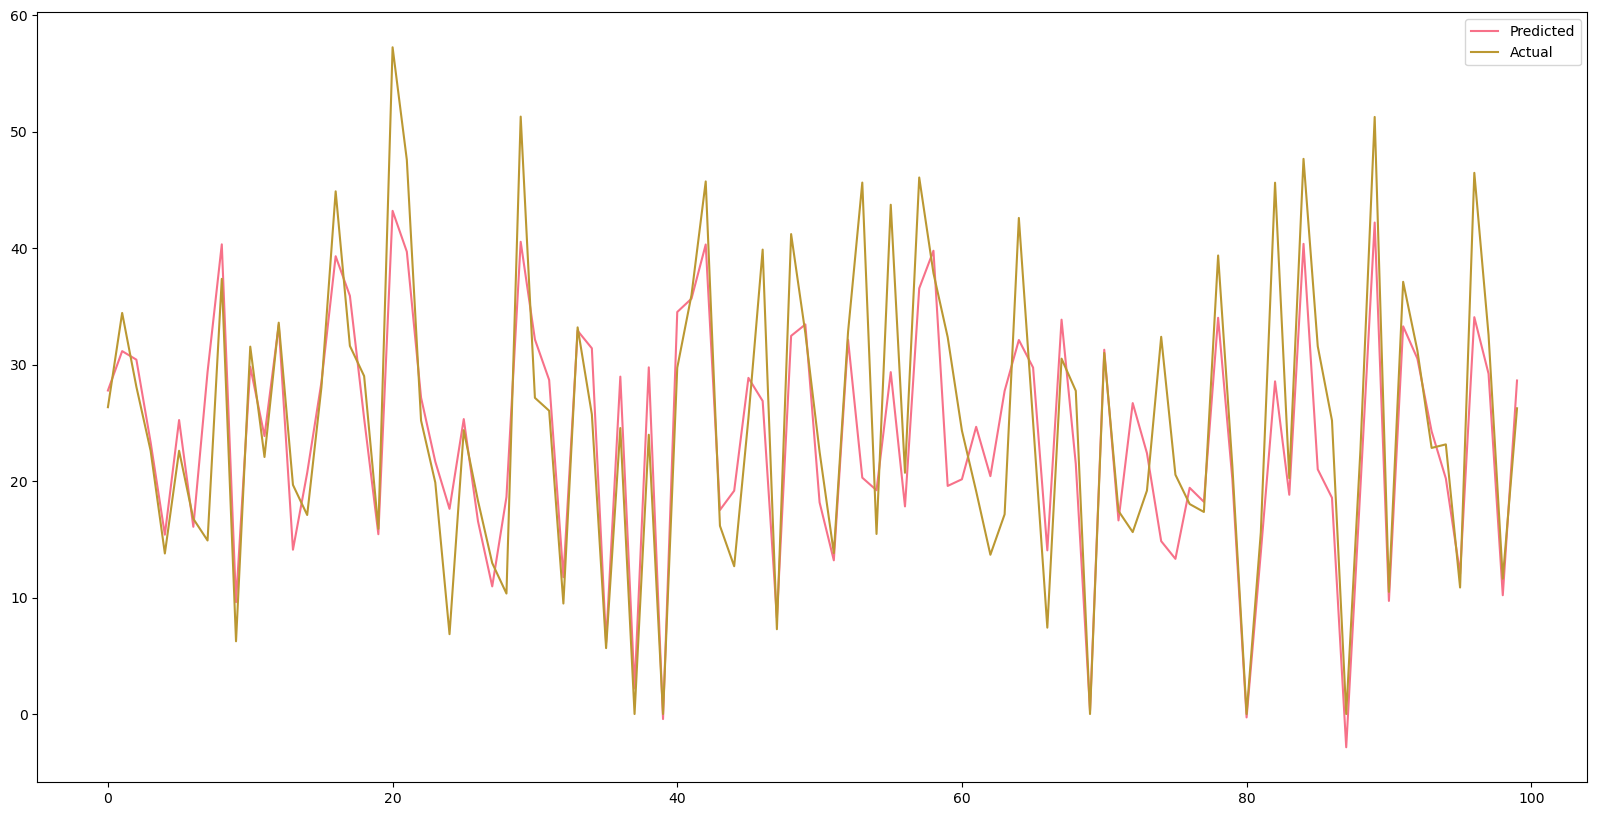

In [112]:
# calling train_linear_model to train,fit and evalution of polynomial model
train_linear_model(pipe,X_train,y_train,X_test,y_test)

# KNN and Tree Based Method

In [113]:
#creatin X for independent variable
X = df.drop(['Rented Bike Count'],axis=1)

In [114]:
#creating y for dependent variable
y = df['Rented Bike Count']

In [115]:
#spliting X and y to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# KNN Regression

In [116]:
#creating model
scaler = MinMaxScaler()

In [117]:
#scaling all the feature by min max scaler
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


================Evalution Matrix=========================

MSE : 83019.03470319635
RMSE : 288.1302391336188
R2 : 0.797119170987258
Adjusted R2 :  0.795625340676994

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



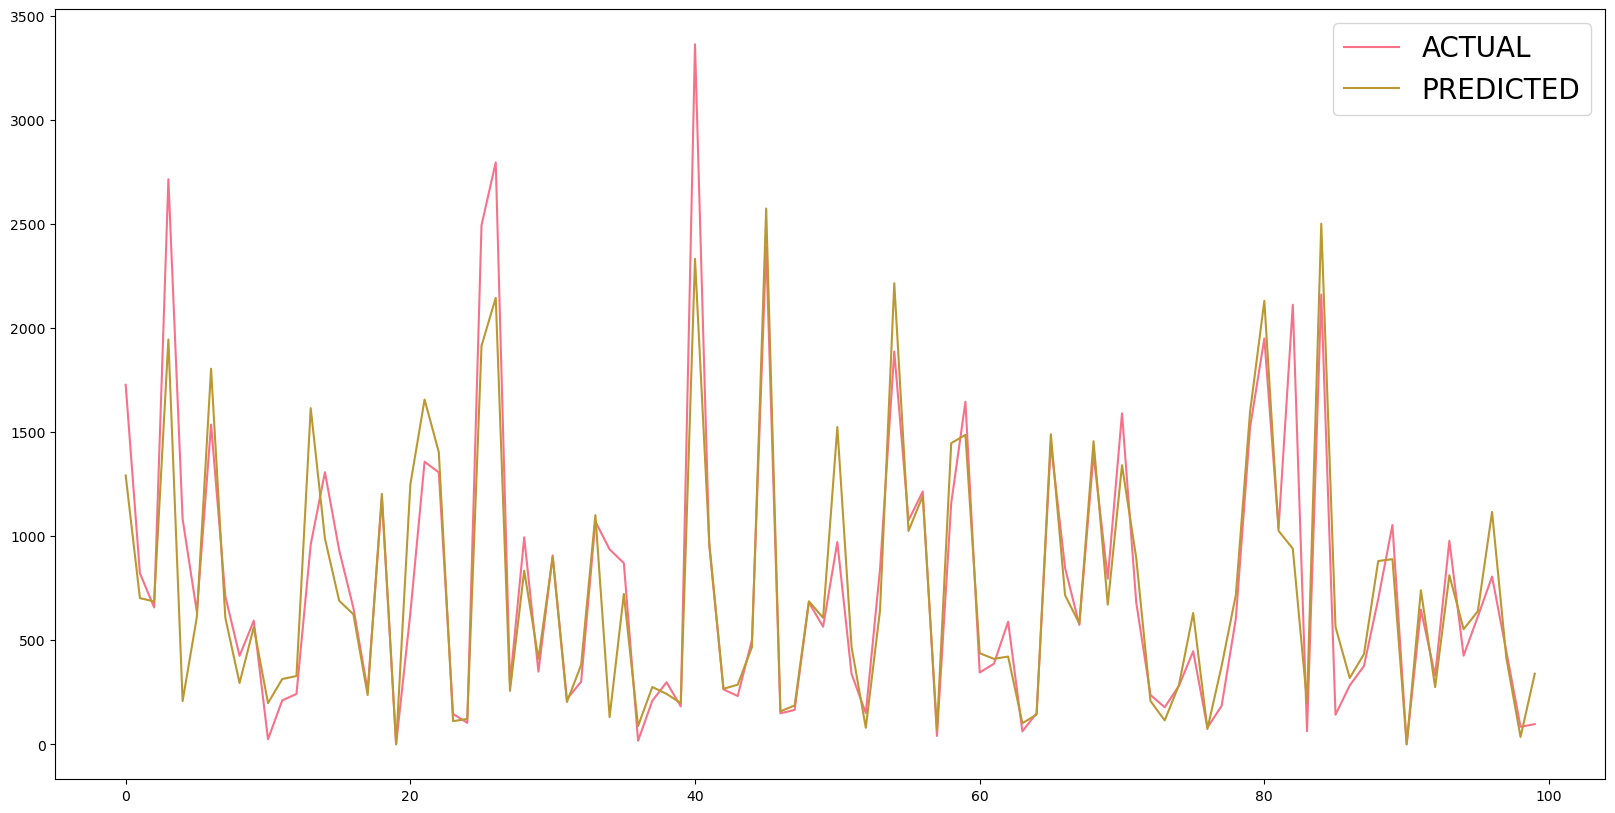

In [118]:
# creating KNN model
knn_model = KNeighborsRegressor(n_jobs=-1)

# finding the best parameters for knn_model by gridsearchcv
param_dict={'n_neighbors':[3,5,7,9,11,13,15,21,23,25]}
knn_grid= GridSearchCV(knn_model,param_grid=param_dict)

# training and evaluating the PolynomialFeatures
run_model(knn_grid,X_train_scaled,y_train,X_test_scaled,y_test)

# Decision Tree Regression


================Evalution Matrix=========================

MSE : 61171.3
RMSE : 247.32832429788547
R2 : 0.8505103787323449
Adjusted R2 :  0.8494096728233332

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



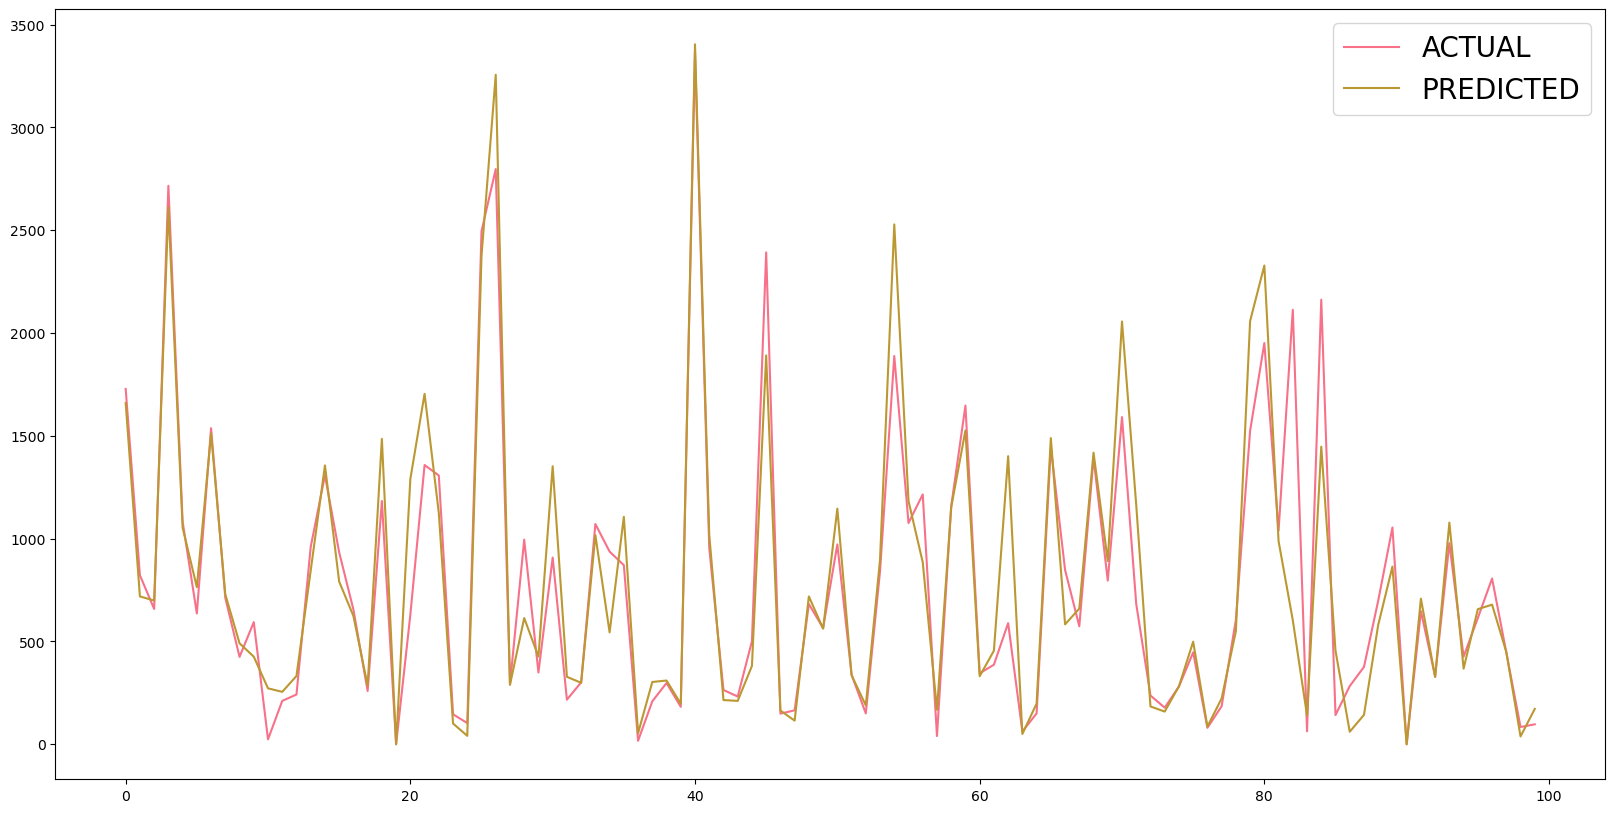

In [119]:
#creating decision tree model
dt_model = DecisionTreeRegressor()
#calling run_model to train,fit and evalution of decision tree model
run_model(dt_model,X_train,y_train,X_test,y_test)

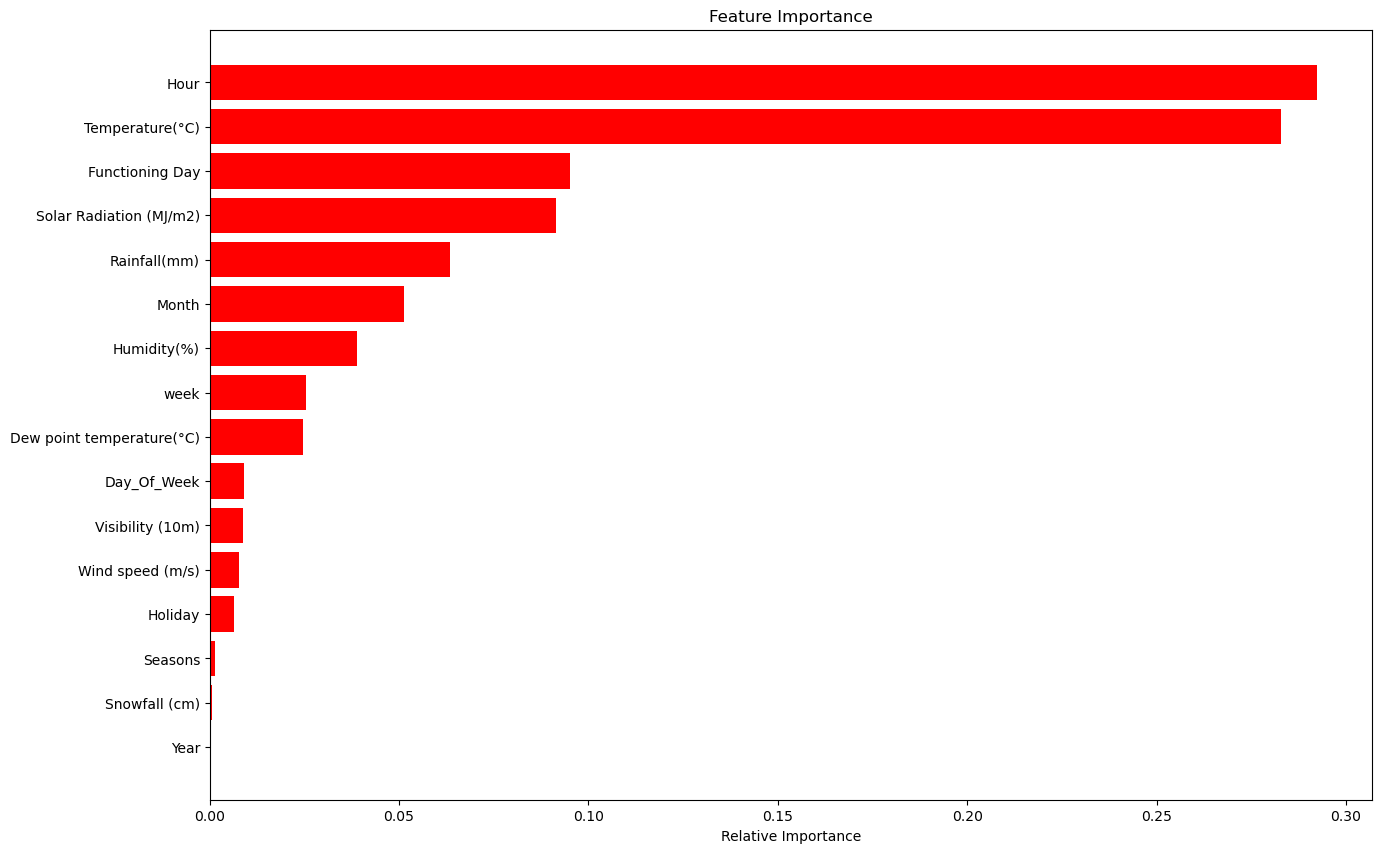

In [120]:
#getting features importance of decision tree
get_features_importance(dt_model,X_train)

# Random Forest

In [121]:
#creating model of random forest
rf_model = RandomForestRegressor()

In [122]:
#creating param dict to check random forest with diffirent value of parameter through gridsearch
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}

In [123]:
#creating rf_grid model to run rf model with gridsearch
rf_grid= GridSearchCV(rf_model,param_grid = params,verbose = 0)


================Evalution Matrix=========================

MSE : 51175.21136730659
RMSE : 226.21938769103454
R2 : 0.8749386891305095
Adjusted R2 :  0.8740178511305501

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



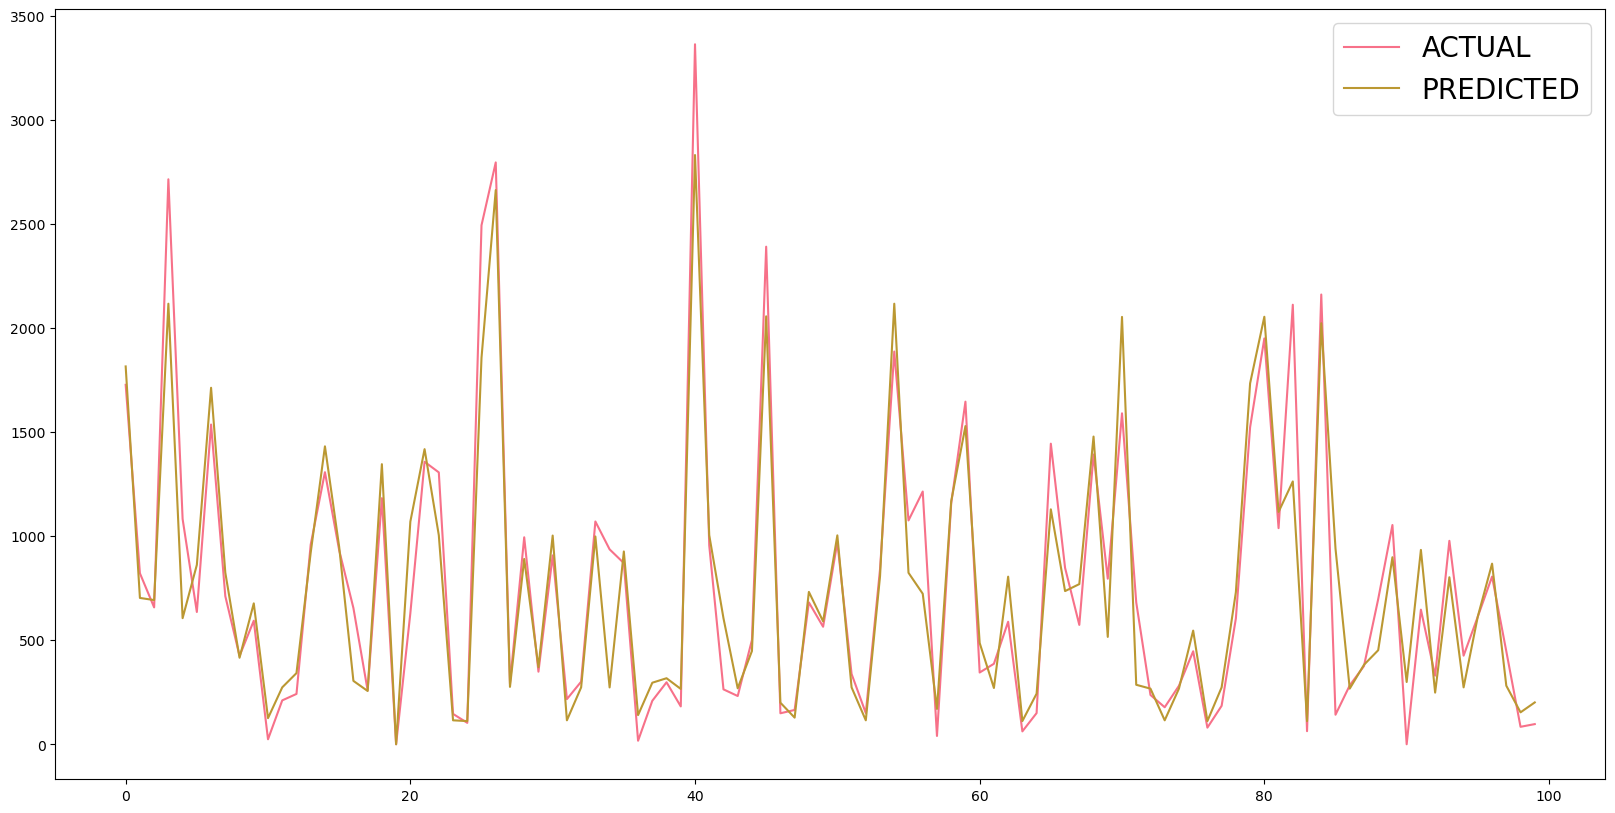

In [124]:
#calling run_model to train,fit and evalution of decision tree model
run_model(rf_grid,X_train,y_train,X_test,y_test)

In [125]:
#optimal rf model
optimal_rf_model = rf_grid.best_estimator_

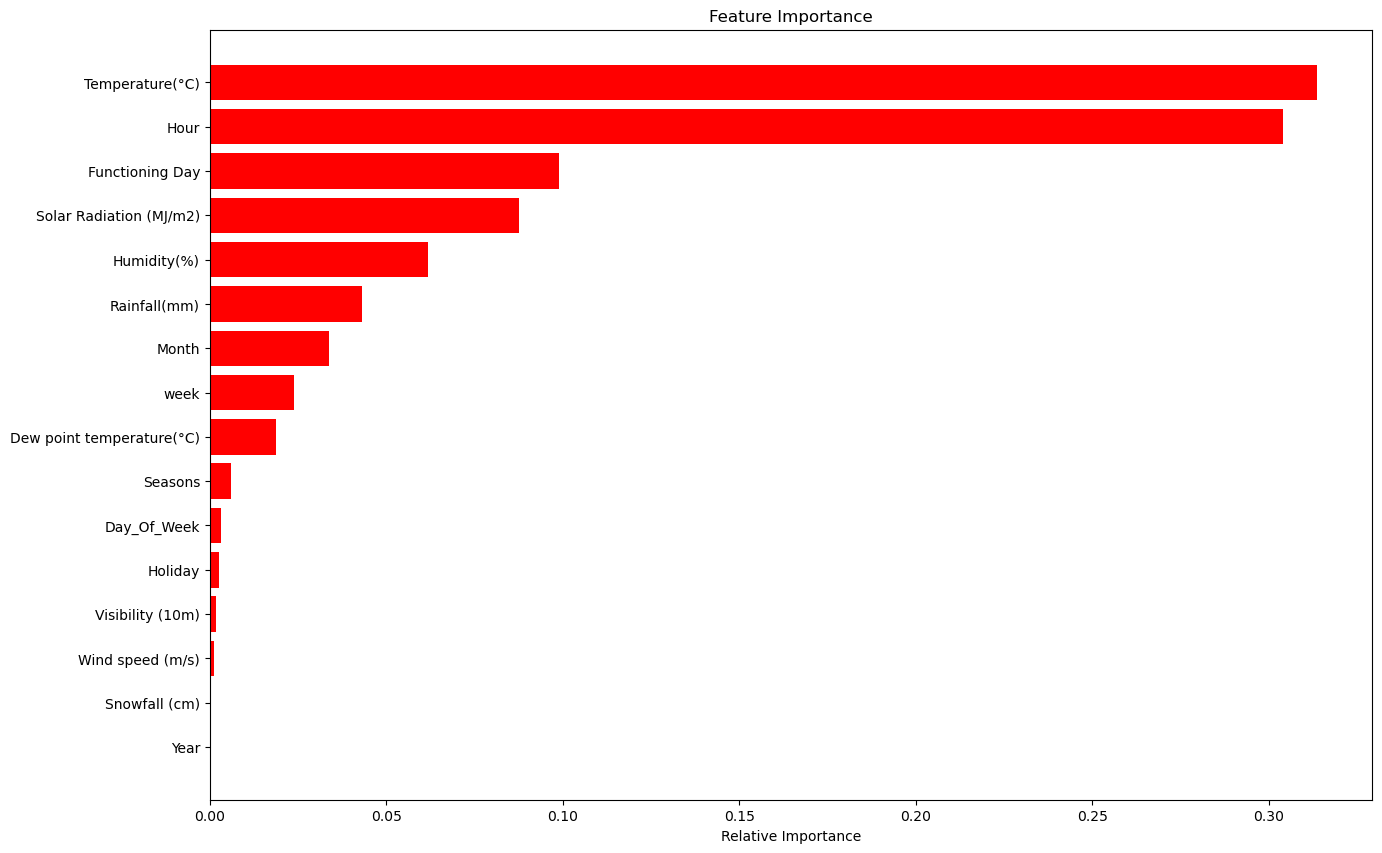

In [126]:
#getting and visualizing features importance  of rf model
get_features_importance(optimal_rf_model,X_train)

# Gradient Boosting Regressor

In [127]:
#creating model of Gradient Boosting
gb_model = GradientBoostingRegressor()

In [128]:
# creating param dict to check diffirent value of parameter
n_estimators=[80,100,150]
max_depth=[15,20,30]

params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [129]:
#grid search for gradient bossting
gb_grid= GridSearchCV(gb_model,param_grid=params,verbose=0)


================Evalution Matrix=========================

MSE : 41451.142038637154
RMSE : 203.5955354093924
R2 : 0.8987022423184132
Adjusted R2 :  0.8979563775586776

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



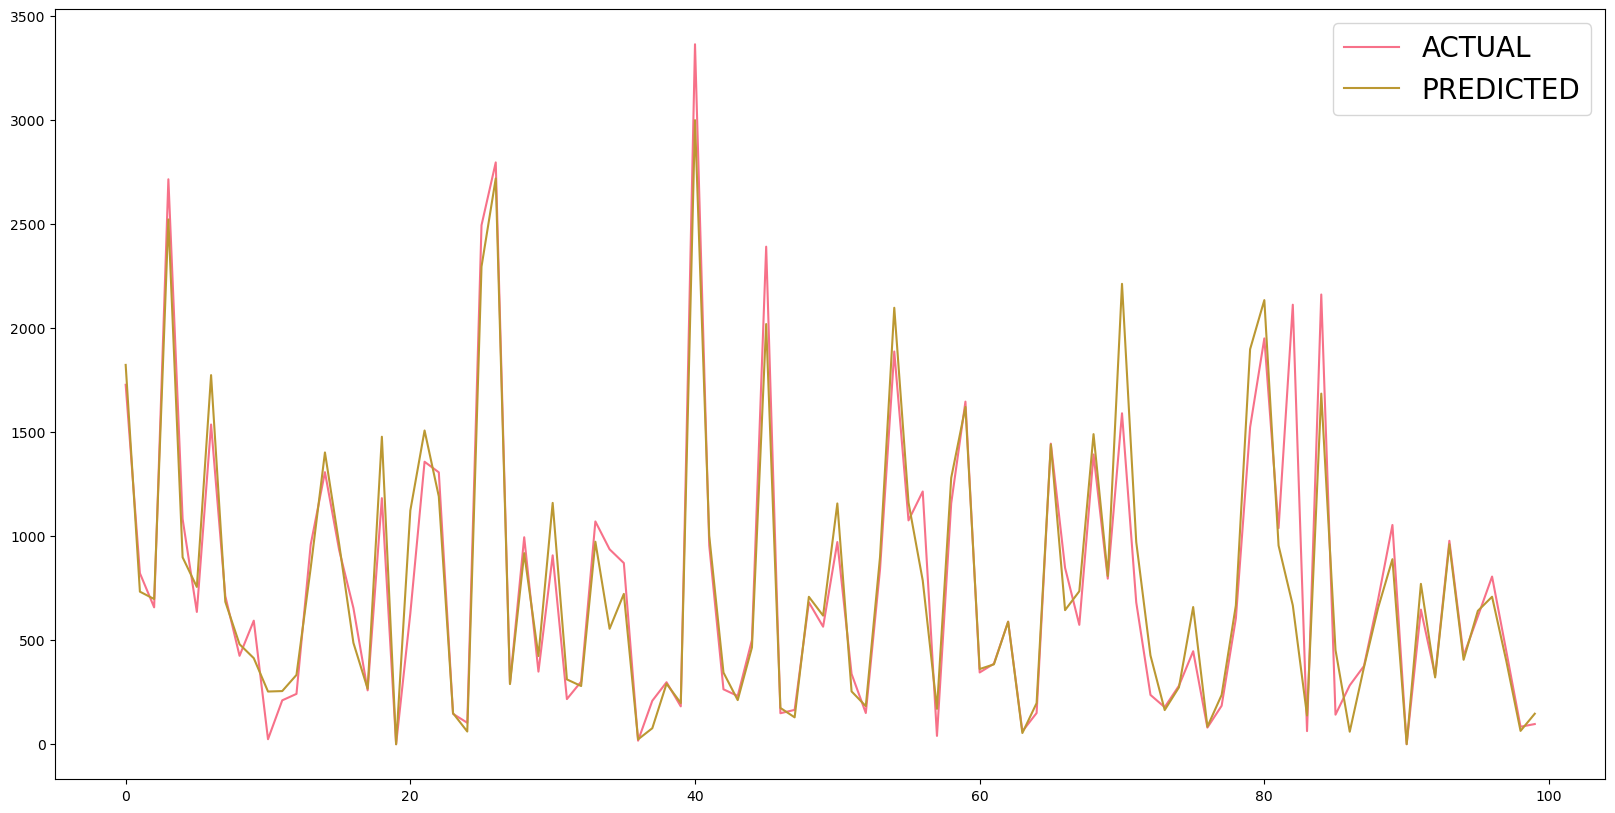

In [130]:
#calling run_model to train,fit and evalution of gradient boosting model
run_model(gb_grid,X_train,y_train,X_test,y_test)

In [131]:
#getting best estimator of GB model given by gb_grid model
optimal_gb_model=gb_grid.best_estimator_

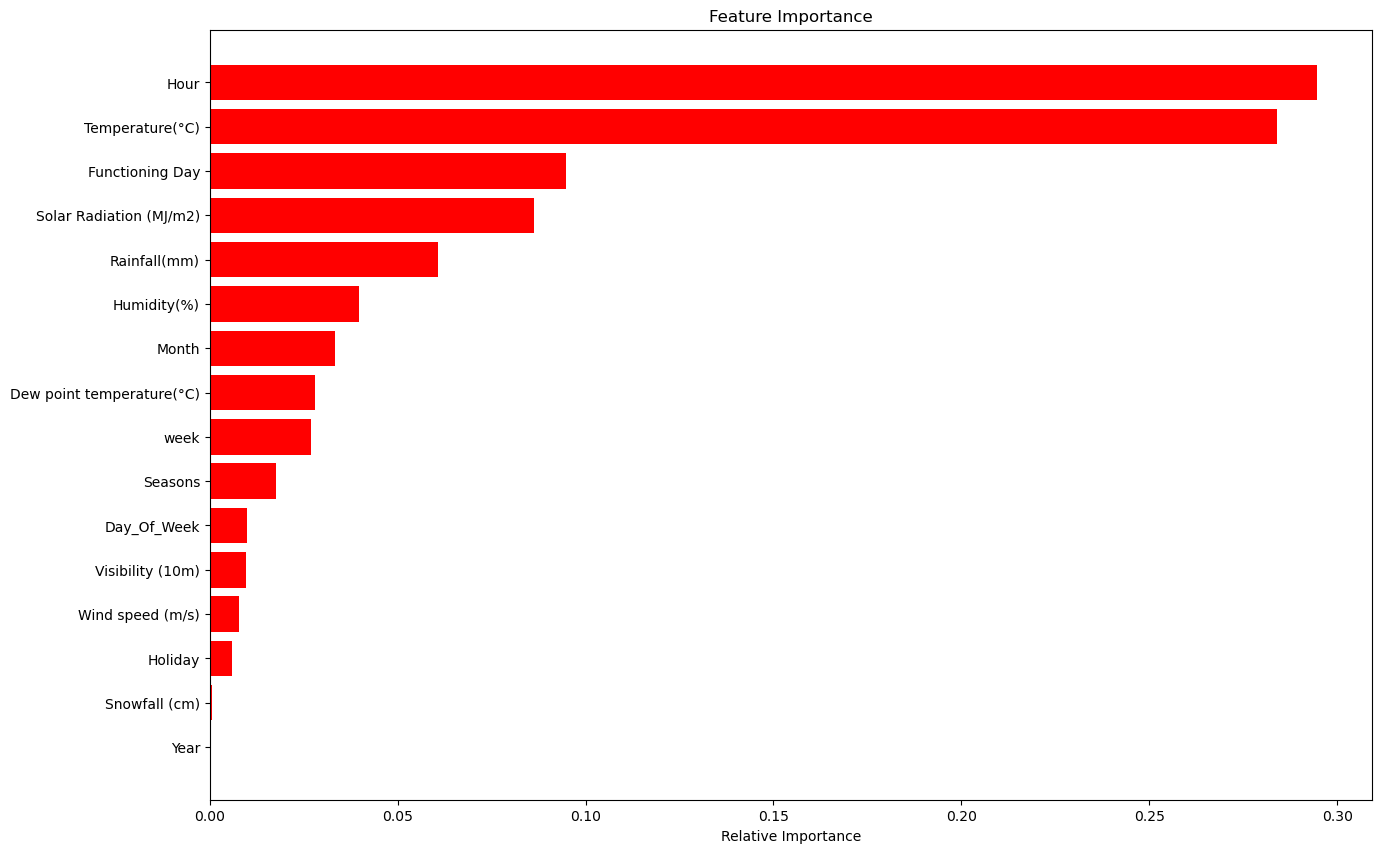

In [132]:
#getting and visualizing features_importance of gradient boosting
get_features_importance(optimal_gb_model,X_train)

# Cat Boost

In [133]:
# creating Catboost model
cb_model = CatBoostRegressor(verbose = 0)


================Evalution Matrix=========================

MSE : 24028.438441225557
RMSE : 155.01109134905656
R2 : 0.9412796170388406
Adjusted R2 :  0.9408472534275296

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



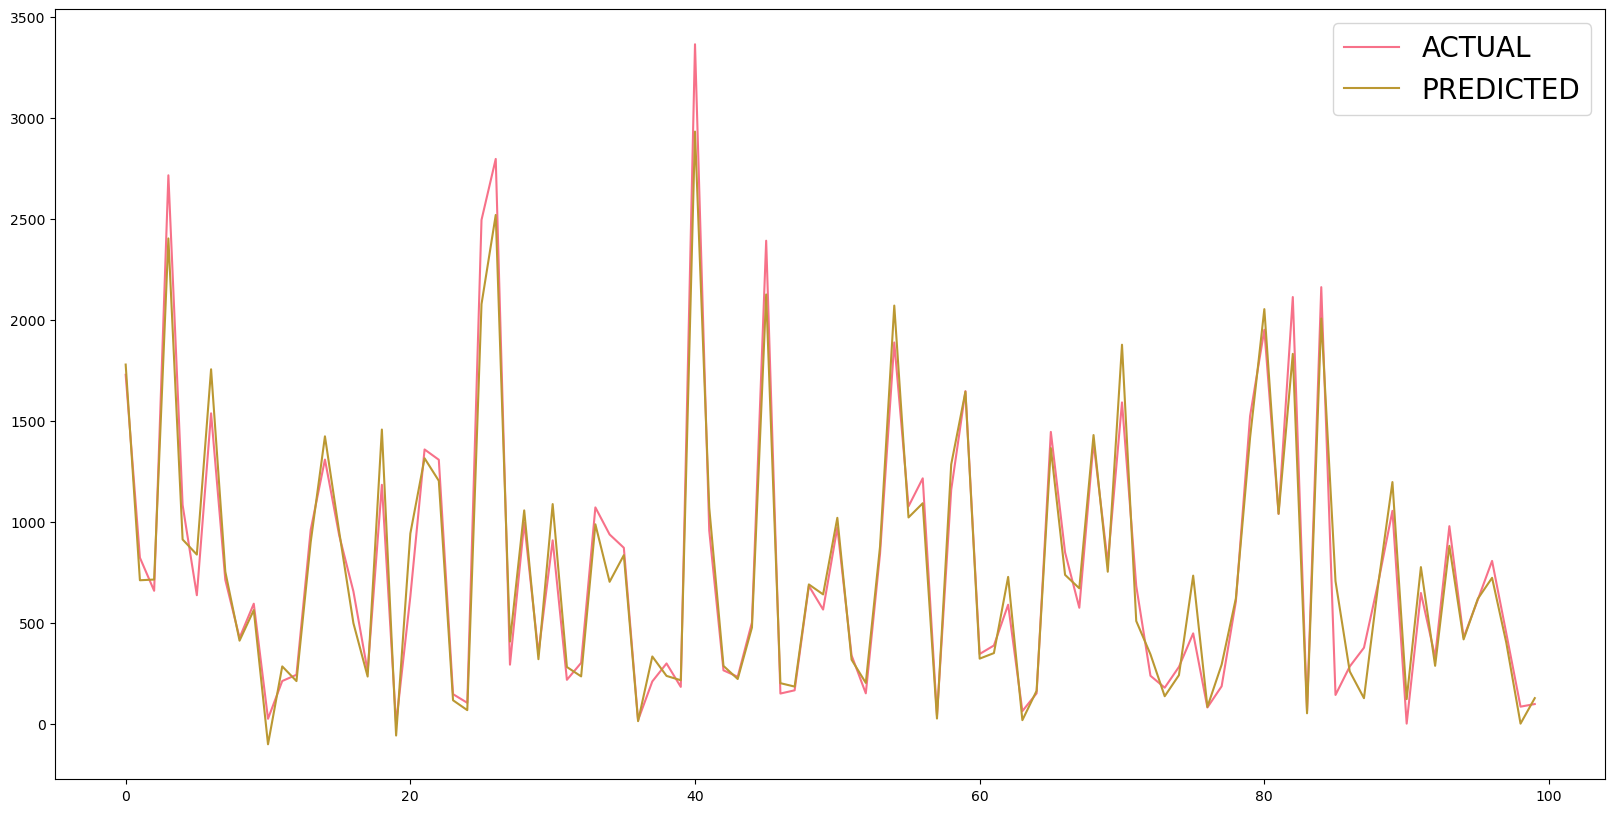

In [134]:
#calling run_model to train,fit and evalution of catboost model
run_model(cb_model,X_train,y_train,X_test,y_test)

In [135]:
#checking params of cat boost model
cb_model.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'random_score_type': 'NormalWithModelSizeDecrease',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'RMSE',
 'lear

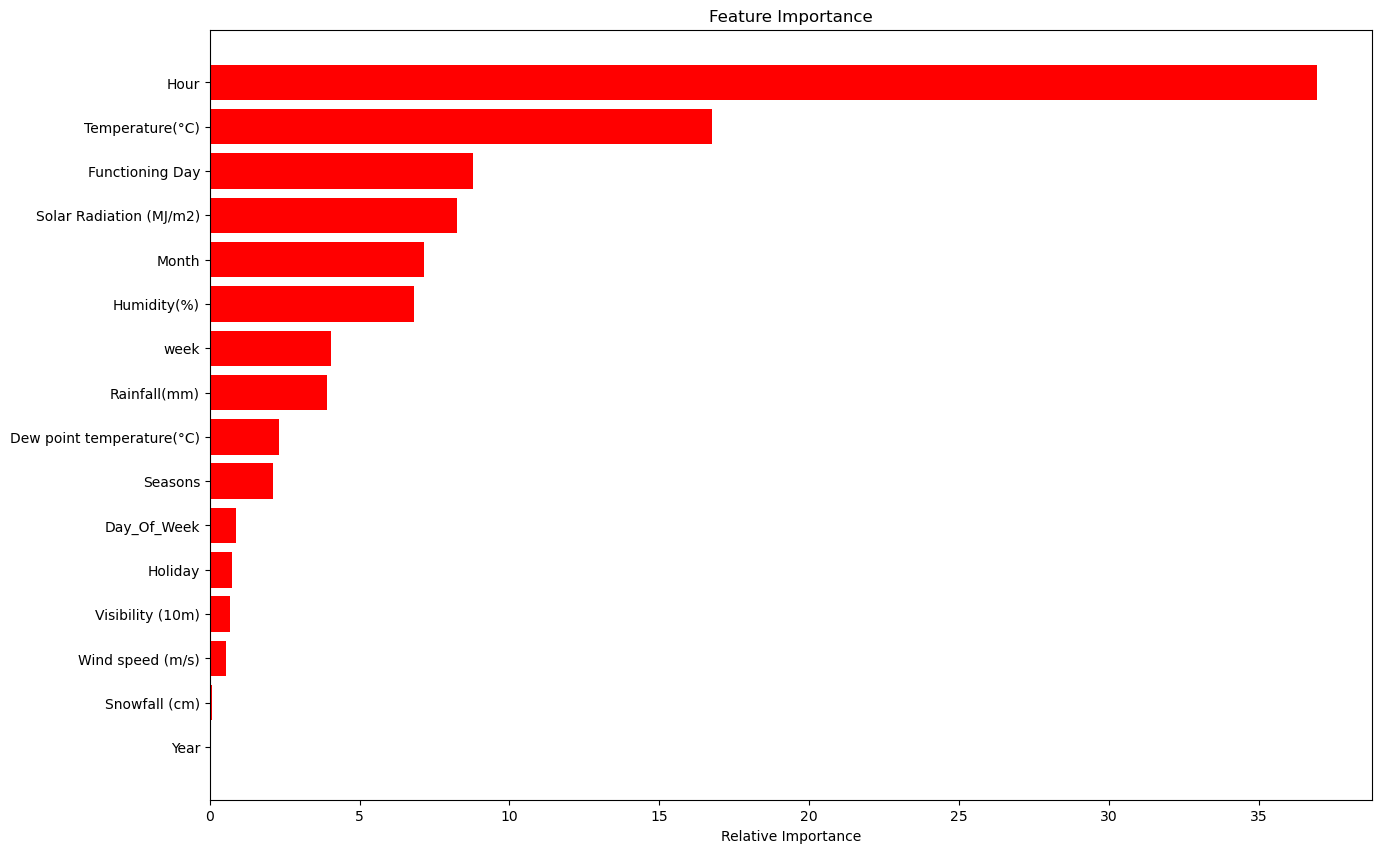

In [136]:
#getting and visualizing features importance of catboost model
get_features_importance(cb_model,X_train)